In [1]:
import ROOT
import itertools
from array import array
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.10/05


In [2]:
#Color Codes
cols1 = 7
cols2 = 1
colb1 = 2
colb2 = 3

#alpha transparency level (not used yet)
alphaS = 0.5
alphaB = 0.25

In [3]:
#prototype histos for legend entries
h0s1 = ROOT.TH1F("h0s1", "prototype signal fill", 2, 0, 2)
h0s1.SetLineColor(0)
h0s1.SetFillColorAlpha(cols1, alphaS)
h0b1 = ROOT.TH1F("h0b1", "prototype background fill", 2, 0, 2)
h0b1.SetLineColor(0)
h0b1.SetFillColorAlpha(colb1, alphaB)
h0s2 = ROOT.TH1F("h0s2", "prototype signal line", 2, 0, 2)
h0s2.SetLineColor(cols2)
h0b2 = ROOT.TH1F("h0b2", "prototype background fill", 2, 0, 2)
h0b2.SetLineColor(cols1)

In [4]:
#legend codes
leg0a = "TTTT"
leg0b = "TT GenFilt"
leg1 = "TTTT(HOT)"
leg2 = "TT GenFilt(HOT)"
leg3 = "TTTT(BDT)"
leg4 = "TT GenFilt(BDT)"

CountLeg = ROOT.TLegend(0.7,0.85,0.95, 0.95)
#CountLeg.SetHeader("","C") # option "C" allows to center the header
CountLeg.AddEntry(h0s1, leg0a,"f")
CountLeg.AddEntry(h0b1,leg0b,"f")
#DiscLeg = ROOT.TLegend(0.1,0.7,0.48,0.9)
DiscLeg = ROOT.TLegend(0.43, 0.75, 0.67, 0.90)
#DiscLeg.SetHeader("The Legend Title","C") # option "C" allows to center the header
DiscLeg.AddEntry(h0s1,leg1,"f")
DiscLeg.AddEntry(h0b1,leg2,"f")
DiscLeg.AddEntry(h0s2,leg3,"l")
DiscLeg.AddEntry(h0b2,leg4,"lep")
#DiscLeg.SetHeader("The Legend Title","C") #option "C" allows to center the header
#DiscLeg.AddEntry(h1,"Histogram filled with random numbers","f")
#DiscLeg.AddEntry("f1","Function abs(#frac{sin(x)}{x})","l")
#DiscLeg.AddEntry("gr","Graph with error bars","lep")
#DiscLeg.AddEntry("gr","Graph with error bars","lep")

<ROOT.TLegendEntry object ("TLegendEntry") at 0x4b42540>

In [5]:
signal = ROOT.TFile("~/LTW4/TopTagger/TopTagger/test/resTTTT500HT_v4p1.root", "r")
bkgd = ROOT.TFile("~/LTW4/TopTagger/TopTagger/test/resTTSLFilt500HT_v4p1.root", "r")

In [66]:
signal.ls()
#print(signal.h_nTrueRecoTops.GetEntries())

TFile**		/afs/cern.ch/user/n/nmangane/LTW4/TopTagger/TopTagger/test/resTTTT500HT_v4p1.root	
 TFile*		/afs/cern.ch/user/n/nmangane/LTW4/TopTagger/TopTagger/test/resTTTT500HT_v4p1.root	
  OBJ: TH1I	h_nTrueRecoTops_full	Number of true hadronic tops that are fully in event selection and acceptance : 0 at: 0x4cc5160
  OBJ: TH1I	h_nTrueRecoTops	Number of true hadronic tops in events surviving event selection : 0 at: 0x4cf8640
  OBJ: TH1I	h_nCandTops_hot	Number of tagger candidate (HOT) tops in events surviving event selection : 0 at: 0x4cf8c20
  OBJ: TH1I	h_nCandTops_bdt	Number of tagger candidate (BDT) tops in events surviving event selection : 0 at: 0x4cf9010
  OBJ: TH1I	h_nCandTops_hot1	Number of tagger candidate (HOT) tops in events with 1 real hadronic top : 0 at: 0x4cf95e0
  OBJ: TH1I	h_nCandTops_bdt1	Number of tagger candidate (BDT) tops in events with 1 real hadronic top : 0 at: 0x4cf9ba0
  OBJ: TH1I	h_nCandTops_hot2	Number of tagger candidate (HOT) tops in events with 2 real hadroni

In [7]:
h1s = signal.h_nTrueRecoTops_full#Number of true hadronic tops that are fully in event selection and acceptance
h2s = signal.h_nTrueRecoTops
h3s = signal.h_nCandTops_hot
h4s = signal.h_nCandTops_bdt
h5s = signal.h_nCandTops_hot1
h6s = signal.h_nCandTops_bdt1
h7s = signal.h_nCandTops_hot2
h8s = signal.h_nCandTops_bdt2
h9s = signal.h_nCandTops_hot3
h10s = signal.h_nCandTops_bdt3
h11s = signal.h_nCandTops_hot4
h12s = signal.h_nCandTops_bdt4
h13s = signal.h_nCandTops_hot_oth
h14s = signal.h_nCandTops_bdt_oth

In [8]:
h1b = bkgd.h_nTrueRecoTops_full#Number of true hadronic tops that are fully in event selection and acceptance
h2b = bkgd.h_nTrueRecoTops
h3b = bkgd.h_nCandTops_hot
h4b = bkgd.h_nCandTops_bdt
h5b = bkgd.h_nCandTops_hot1
h6b = bkgd.h_nCandTops_bdt1
h7b = bkgd.h_nCandTops_hot2
h8b = bkgd.h_nCandTops_bdt2
h9b = bkgd.h_nCandTops_hot3
h10b = bkgd.h_nCandTops_bdt3
h11b = bkgd.h_nCandTops_hot4
h12b = bkgd.h_nCandTops_bdt4
h13b = bkgd.h_nCandTops_hot_oth
h14b = bkgd.h_nCandTops_bdt_oth

In [9]:
c1 = ROOT.TCanvas("c1")
c2 = ROOT.TCanvas("c2")
c3 = ROOT.TCanvas("c3")
c4 = ROOT.TCanvas("c4")
c5 = ROOT.TCanvas("c5")
c6 = ROOT.TCanvas("c6")
c7 = ROOT.TCanvas("c7")
c8 = ROOT.TCanvas("c8")
c9 = ROOT.TCanvas("c9")
c10 = ROOT.TCanvas("c10")
c11 = ROOT.TCanvas("c11")
c12 = ROOT.TCanvas("c12")
c13 = ROOT.TCanvas("c13")
c14 = ROOT.TCanvas("c14")
c15 = ROOT.TCanvas("c15")
c16 = ROOT.TCanvas("c16")
c17 = ROOT.TCanvas("c17")
c18 = ROOT.TCanvas("c18")
c19 = ROOT.TCanvas("c19")
c20 = ROOT.TCanvas("c20")
c21 = ROOT.TCanvas("c21")
c22 = ROOT.TCanvas("c22")
c23 = ROOT.TCanvas("c23")
c24 = ROOT.TCanvas("c24")
c25 = ROOT.TCanvas("c25")
c26 = ROOT.TCanvas("c26")
c27 = ROOT.TCanvas("c27")
c28 = ROOT.TCanvas("c28")
c29 = ROOT.TCanvas("c29")
c30 = ROOT.TCanvas("c30")
c31 = ROOT.TCanvas("c31")
c32 = ROOT.TCanvas("c32")
c33 = ROOT.TCanvas("c33")
c34 = ROOT.TCanvas("c34")

cN1 = ROOT.TCanvas("cN1")
cN2 = ROOT.TCanvas("cN2")
cN3 = ROOT.TCanvas("cN3")

Signal Entries: 50718.0		Background Entries: 31028.0


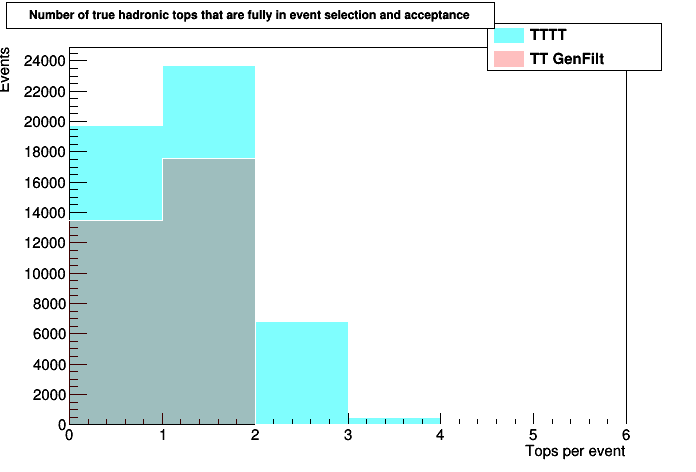

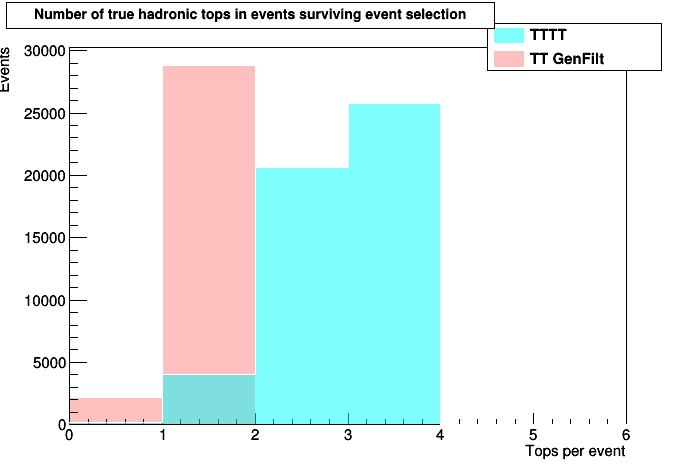

In [10]:
c1.cd()
h1s.SetFillColorAlpha(cols1, alphaS)
h1b.SetFillColorAlpha(colb1, alphaB)
h1s.SetLineColor(0)
h1b.SetLineColor(0)
print("Signal Entries: " + str(h1s.GetEntries()) + "\t\tBackground Entries: " + str(h1b.GetEntries()))
h1s.Draw()
h1b.Draw("Same")
CountLeg.Draw()
c1.Update()
c1.Draw()
c2.cd()
h2s.SetFillColorAlpha(cols1, alphaS)
h2b.SetFillColorAlpha(colb1, alphaB)
h2s.SetLineColor(0)
h2b.SetLineColor(0)
#print("Signal Entries: " + str(h2s.GetEntries()) + "\t\tBackground Entries: " + str(h2b.GetEntries()))
h2b.Draw()
h2s.Draw("Same")
CountLeg.Draw()
c2.Update()
c2.Draw()

Signal Entries: 50718.0		Background Entries: 31028.0


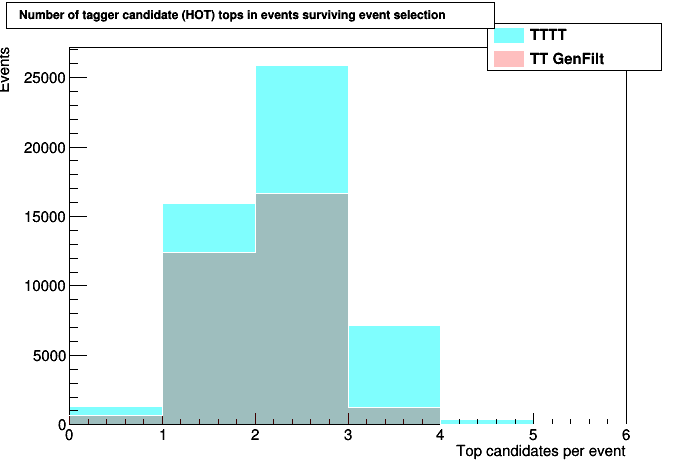

In [11]:
c3.cd()
h3s.SetFillColorAlpha(cols1, alphaS)
h3b.SetFillColorAlpha(colb1, alphaB)
h3s.SetLineColor(0)
h3b.SetLineColor(0)
h4s.SetLineColor(cols2)
h4b.SetLineColor(colb2)
h3s.Draw()
h3b.Draw("Same")
#h4s.Draw()
#h4b.Draw("Same")
#print("Teal: TTTT(HOT)\tBlack: TT(HOT)\t)
print("Signal Entries: " + str(h3s.GetEntries()) + "\t\tBackground Entries: " + str(h3b.GetEntries()))
CountLeg.Draw()
c3.Update()
c3.Draw()


Signal Entries: 4068.0		Background Entries: 28837.0


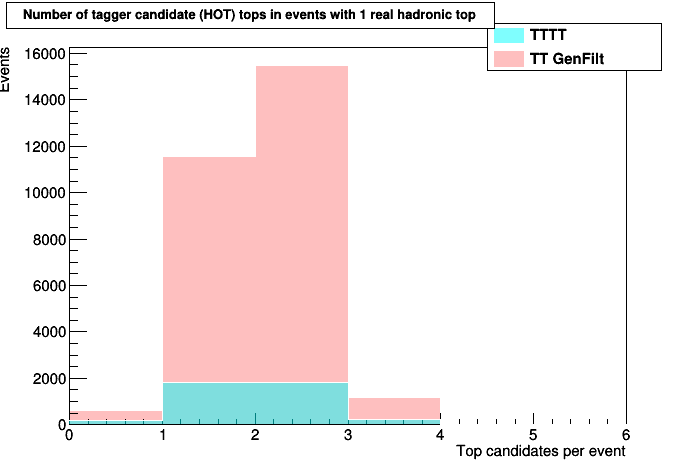

In [12]:
c4.cd()
h5s.SetFillColorAlpha(cols1, alphaS)
h5b.SetFillColorAlpha(colb1, alphaB)
h5s.SetLineColor(0)
h5b.SetLineColor(0)
h6s.SetLineColor(cols2)
h6b.SetLineColor(colb2)
h5b.Draw()
h5s.Draw("Same")
#h6s.Draw()
#h6b.Draw("Same")
#print("Teal: TTTT(HOT)\tBlack: TT(HOT)\t)
print("Signal Entries: " + str(h5s.GetEntries()) + "\t\tBackground Entries: " + str(h5b.GetEntries()))
CountLeg.Draw()
c4.Update()
c4.Draw()

Signal Entries: 20662.0		Background Entries: 0.0


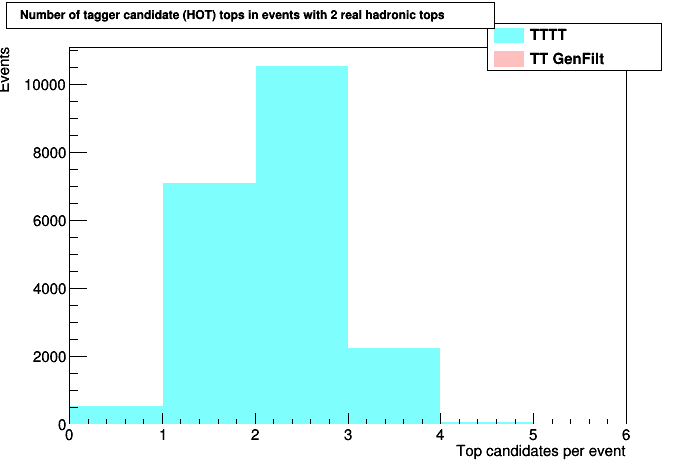

In [13]:
c5.cd()
h7s.SetFillColorAlpha(cols1, alphaS)
h7b.SetFillColorAlpha(colb1, alphaB)
h7s.SetLineColor(0)
h7b.SetLineColor(0)
h8s.SetLineColor(cols2)
h8b.SetLineColor(colb2)
h7s.Draw()
h7b.Draw("Same")
#h8s.Draw()
#h8b.Draw("Same")
#print("Teal: TTTT(HOT)\tBlack: TT(HOT)\t)
print("Signal Entries: " + str(h7s.GetEntries()) + "\t\tBackground Entries: " + str(h7b.GetEntries()))
CountLeg.Draw()
c5.Update()
c5.Draw()

Signal Entries: 25742.0		Background Entries: 0.0


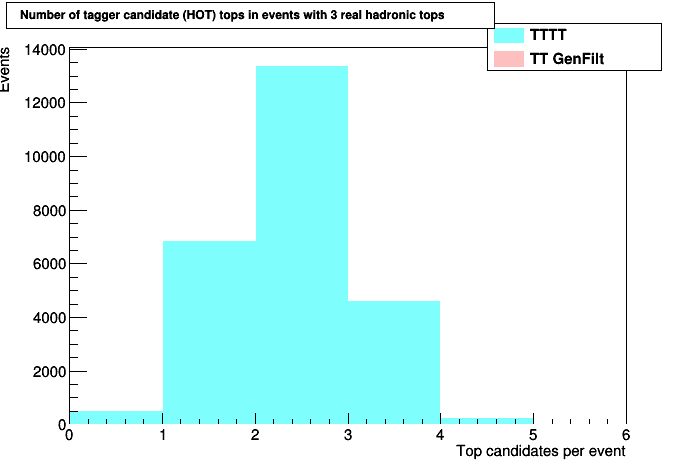

In [14]:
c6.cd()
h9s.SetFillColorAlpha(cols1, alphaS)
h9b.SetFillColorAlpha(colb1, alphaB)
h9s.SetLineColor(0)
h9b.SetLineColor(0)
h10s.SetLineColor(cols2)
h10b.SetLineColor(colb2)
h9s.Draw()
h9b.Draw("Same")
#h10s.Draw()
#h10b.Draw("Same")
#print("Teal: TTTT(HOT)\tBlack: TT(HOT)\t)
print("Signal Entries: " + str(h9s.GetEntries()) + "\t\tBackground Entries: " + str(h9b.GetEntries()))
CountLeg.Draw()
c6.Update()
c6.Draw()

Signal Entries: 24.0		Background Entries: 0.0


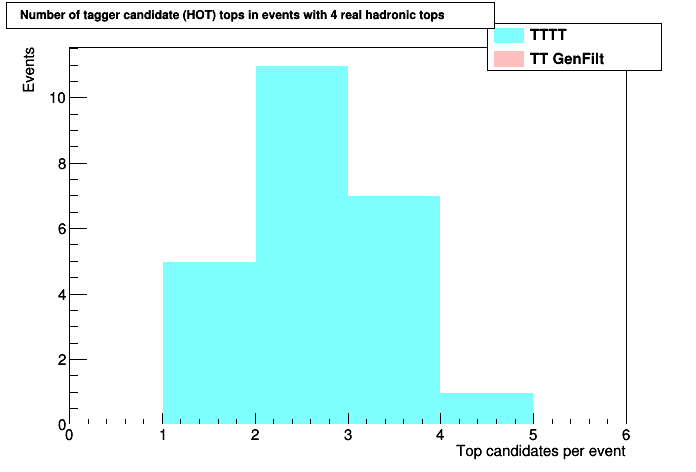

In [15]:
c7.cd()
h11s.SetFillColorAlpha(cols1, alphaS)
h11b.SetFillColorAlpha(colb1, alphaB)
h11s.SetLineColor(0)
h11b.SetLineColor(0)
h12s.SetLineColor(cols2)
h12b.SetLineColor(colb2)
h11s.Draw()
h11b.Draw("Same")
#h12s.Draw()
#h12b.Draw("Same")
#print("Teal: TTTT(HOT)\tBlack: TT(HOT)\t)
print("Signal Entries: " + str(h11s.GetEntries()) + "\t\tBackground Entries: " + str(h11b.GetEntries()))
CountLeg.Draw()
c7.Update()
c7.Draw()

Signal Entries: 222.0		Background Entries: 2191.0


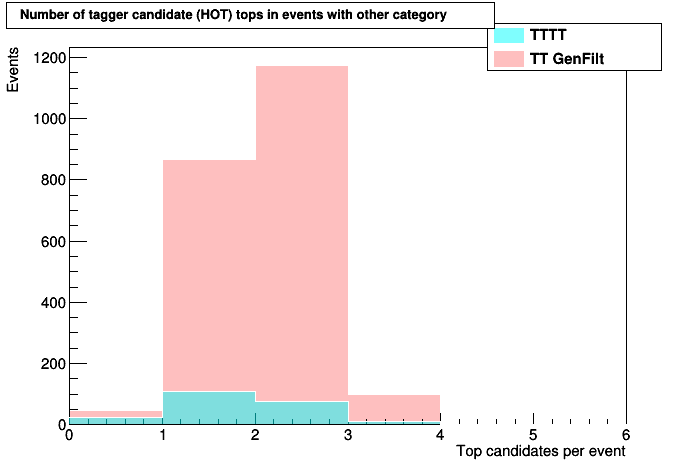

In [16]:
c8.cd()
h13s.SetFillColorAlpha(cols1, alphaS)
h13b.SetFillColorAlpha(colb1, alphaB)
h13s.SetLineColor(0)
h13b.SetLineColor(0)
h14s.SetLineColor(cols2)
h14b.SetLineColor(colb2)
h13b.Draw()
h13s.Draw("Same")
#h14s.Draw()
#h14b.Draw("Same")
#print("Teal: TTTT(HOT)\tBlack: TT(HOT)\t)
print("Signal Entries: " + str(h13s.GetEntries()) + "\t\tBackground Entries: " + str(h13b.GetEntries()))
CountLeg.Draw()
c8.Update()
c8.Draw()

In [17]:
h15s = signal.h_nCandFullTops_hot_0#;1	Number of tagger candidate (HOT) tops in events with 0 full-reco hadronic tops
h16s = signal.h_nCandFullTops_bdt_0#;1	Number of tagger candidate (BDT) tops in events with 0 full-reco hadronic tops
h17s = signal.h_nCandFullTops_hot1#;1	Number of tagger candidate (HOT) tops in events with 1 full-reco hadronic top
h18s = signal.h_nCandFullTops_bdt1#;1	Number of tagger candidate (BDT) tops in events with 1 full-reco hadronic top
h19s = signal.h_nCandFullTops_hot2#;1	Number of tagger candidate (HOT) tops in events with 2 full-reco hadronic tops
h20s = signal.h_nCandFullTops_bdt2#;1	Number of tagger candidate (BDT) tops in events with 2 full-reco hadronic tops
h21s = signal.h_nCandFullTops_hot3#;1	Number of tagger candidate (HOT) tops in events with 3 full-reco hadronic tops
h22s = signal.h_nCandFullTops_bdt3#;1	Number of tagger candidate (BDT) tops in events with 3 full-reco hadronic tops
h23s = signal.h_nCandFullTops_hot4#;1	Number of tagger candidate (HOT) tops in events with 4 full-reco hadronic tops
h24s = signal.h_nCandFullTops_bdt4#;1	Number of tagger candidate (BDT) tops in events with 4 full-reco hadronic tops

h15b = bkgd.h_nCandFullTops_hot_0#;1	Number of tagger candidate (HOT) tops in events with 0 full-reco hadronic tops
h16b = bkgd.h_nCandFullTops_bdt_0#;1	Number of tagger candidate (BDT) tops in events with 0 full-reco hadronic tops
h17b = bkgd.h_nCandFullTops_hot1#;1	Number of tagger candidate (HOT) tops in events with 1 full-reco hadronic top
h18b = bkgd.h_nCandFullTops_bdt1#;1	Number of tagger candidate (BDT) tops in events with 1 full-reco hadronic top
h19b = bkgd.h_nCandFullTops_hot2#;1	Number of tagger candidate (HOT) tops in events with 2 full-reco hadronic tops
h20b = bkgd.h_nCandFullTops_bdt2#;1	Number of tagger candidate (BDT) tops in events with 2 full-reco hadronic tops
h21b = bkgd.h_nCandFullTops_hot3#;1	Number of tagger candidate (HOT) tops in events with 3 full-reco hadronic tops
h22b = bkgd.h_nCandFullTops_bdt3#;1	Number of tagger candidate (BDT) tops in events with 3 full-reco hadronic tops
h23b = bkgd.h_nCandFullTops_hot4#;1	Number of tagger candidate (HOT) tops in events with 4 full-reco hadronic tops
h24b = bkgd.h_nCandFullTops_bdt4#;1	Number of tagger candidate (BDT) tops in events with 4 full-reco hadronic tops

Signal Entries: 19735.0		Background Entries: 13448.0


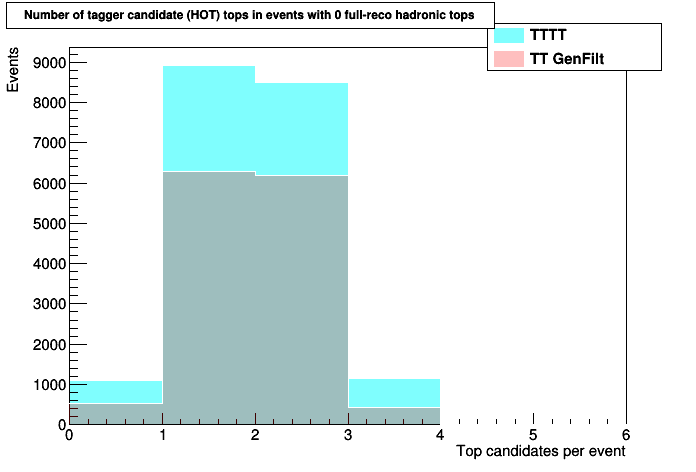

In [18]:
c9.cd()
h15s.SetFillColorAlpha(cols1, alphaS)
h15b.SetFillColorAlpha(colb1, alphaB)
h15s.SetLineColor(0)
h15b.SetLineColor(0)
h16s.SetLineColor(cols2)
h16b.SetLineColor(colb2)
h15s.Draw()
h15b.Draw("Same")
#h16s.Draw()
#h16b.Draw("Same")
#print("Teal: TTTT(HOT)\tBlack: TT(HOT)\t)
print("Signal Entries: " + str(h15s.GetEntries()) + "\t\tBackground Entries: " + str(h15b.GetEntries()))
CountLeg.Draw()
c9.Update()
c9.Draw()

Signal Entries: 23720.0		Background Entries: 17580.0


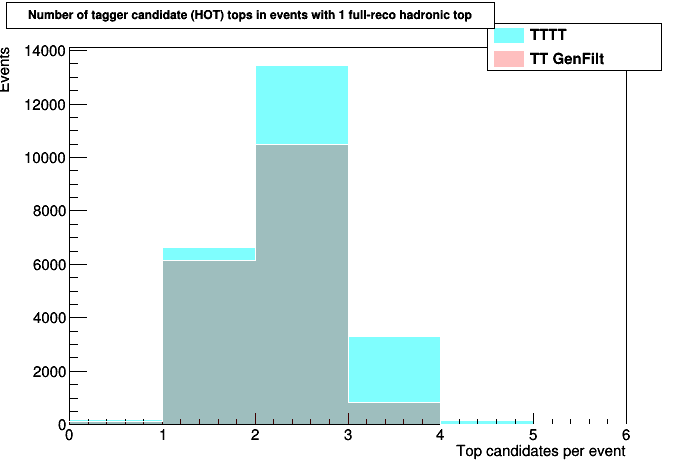

In [19]:
c10.cd()
h17s.SetFillColorAlpha(cols1, alphaS)
h17b.SetFillColorAlpha(colb1, alphaB)
h17s.SetLineColor(0)
h17b.SetLineColor(0)
h18s.SetLineColor(cols2)
h18b.SetLineColor(colb2)
h17s.Draw()
h17b.Draw("Same")
#h18s.Draw()
#h18b.Draw("Same")
#print("Teal: TTTT(HOT)\tBlack: TT(HOT)\t)
print("Signal Entries: " + str(h17s.GetEntries()) + "\t\tBackground Entries: " + str(h17b.GetEntries()))
CountLeg.Draw()
c10.Update()
c10.Draw()

Signal Entries: 6782.0		Background Entries: 0.0


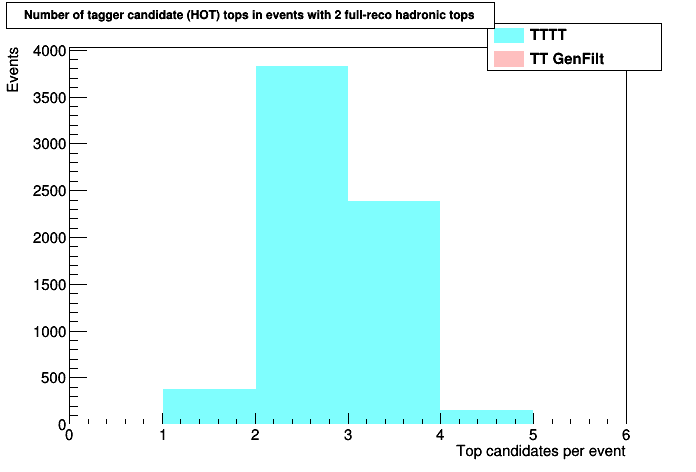

In [20]:
c11.cd()
h19s.SetFillColorAlpha(cols1, alphaS)
h19b.SetFillColorAlpha(colb1, alphaB)
h19s.SetLineColor(0)
h19b.SetLineColor(0)
h20s.SetLineColor(cols2)
h20b.SetLineColor(colb2)
h19s.Draw()
h19b.Draw("Same")
#h20s.Draw()
#h20b.Draw("Same")
#print("Teal: TTTT(HOT)\tBlack: TT(HOT)\t)
print("Signal Entries: " + str(h19s.GetEntries()) + "\t\tBackground Entries: " + str(h19b.GetEntries()))
CountLeg.Draw()
c11.Update()
c11.Draw()

Signal Entries: 481.0		Background Entries: 0.0


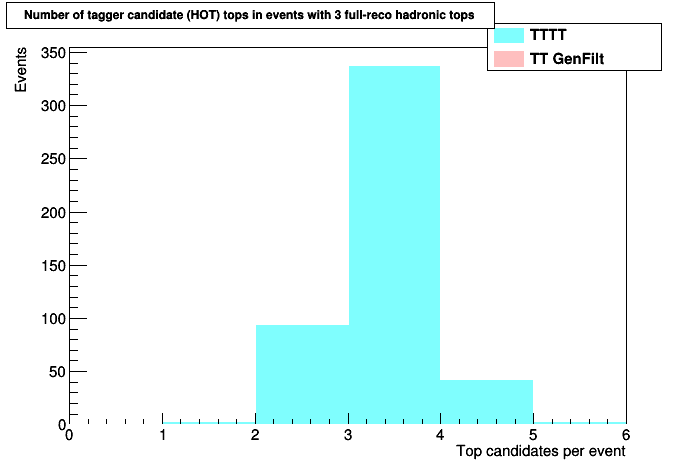

In [21]:
c12.cd()
h21s.SetFillColorAlpha(cols1, alphaS)
h21b.SetFillColorAlpha(colb1, alphaB)
h21s.SetLineColor(0)
h21b.SetLineColor(0)
h22s.SetLineColor(cols2)
h22b.SetLineColor(colb2)
h21s.Draw()
h21b.Draw("Same")
#h22s.DrawNormalized()
#h22b.DrawNormalized("Same")
#print("Teal: TTTT(HOT)\tBlack: TT(HOT)\t)
print("Signal Entries: " + str(h21s.GetEntries()) + "\t\tBackground Entries: " + str(h21b.GetEntries()))
CountLeg.Draw()
c12.Update()
c12.Draw()

In [22]:
c13.cd()

<ROOT.TCanvas object ("c13") at 0x4e26670>

In [23]:
s_hot_3 = signal.h_typeIII_hot_#;1	Type III (correct) Top Quarks
s_hot_2b = signal.h_typeIIb_hot_#;1	Type II (b swapped) Top Quarks
s_hot_2w = signal.h_typeIIw_hot_#;1	Type II (q1 or q2 swapped) Top Quarks
s_hot_2mib = signal.h_typeIImib_hot_#;1	Type II (misidentified b from anywhere non-b) Top Quarks
s_hot_2miq = signal.h_typeIImiq_hot_#;1	Type II (misidentified q from anywhere non-q) Top Quarks
s_hot_1t = signal.h_typeIt_hot_#;1	Type I (3 top-daughters matched, 1 per reco top)
s_hot_1p = signal.h_typeIp_hot_#;1	Type I (2 top-daughters matched, 1 per reco top)
s_hot_0x1 = signal.h_type0xI_hot_#;1	Type 0xI (all other tagger candidates)

b_hot_3 = bkgd.h_typeIII_hot_#;1	Type III (correct) Top Quarks
b_hot_2b = bkgd.h_typeIIb_hot_#;1	Type II (b swapped) Top Quarks
b_hot_2w = bkgd.h_typeIIw_hot_#;1	Type II (q1 or q2 swapped) Top Quarks
b_hot_2mib = bkgd.h_typeIImib_hot_#;1	Type II (misidentified b from anywhere non-b) Top Quarks
b_hot_2miq = bkgd.h_typeIImiq_hot_#;1	Type II (misidentified q from anywhere non-q) Top Quarks
b_hot_1t = bkgd.h_typeIt_hot_#;1	Type I (3 top-daughters matched, 1 per reco top)
b_hot_1p = bkgd.h_typeIp_hot_#;1	Type I (2 top-daughters matched, 1 per reco top)
b_hot_0x1 = bkgd.h_type0xI_hot_#;1	Type 0xI (all other tagger candidates)

s_bdt_3 = signal.h_typeIII_bdt_#;1	Type III (correct) Top Quarks
s_bdt_2b = signal.h_typeIIb_bdt_#;1	Type II (b swapped) Top Quarks
s_bdt_2w = signal.h_typeIIw_bdt_#;1	Type II (q1 or q2 swapped) Top Quarks
s_bdt_2mib = signal.h_typeIImib_bdt_#;1	Type II (misidentified b from anywhere non-b) Top Quarks
s_bdt_2miq = signal.h_typeIImiq_bdt_#;1	Type II (misidentified q from anywhere non-q) Top Quarks
s_bdt_1t = signal.h_typeIt_bdt_#;1	Type I (3 top-daughters matched, 1 per reco top)
s_bdt_1p = signal.h_typeIp_bdt_#;1	Type I (2 top-daughters matched, 1 per reco top)
s_bdt_0x1 = signal.h_type0xI_bdt_#;1	Type 0xI (all other tagger candidates)

b_bdt_3 = bkgd.h_typeIII_bdt_#;1	Type III (correct) Top Quarks
b_bdt_2b = bkgd.h_typeIIb_bdt_#;1	Type II (b swapped) Top Quarks
b_bdt_2w = bkgd.h_typeIIw_bdt_#;1	Type II (q1 or q2 swapped) Top Quarks
b_bdt_2mib = bkgd.h_typeIImib_bdt_#;1	Type II (misidentified b from anywhere non-b) Top Quarks
b_bdt_2miq = bkgd.h_typeIImiq_bdt_#;1	Type II (misidentified q from anywhere non-q) Top Quarks
b_bdt_1t = bkgd.h_typeIt_bdt_#;1	Type I (3 top-daughters matched, 1 per reco top)
b_bdt_1p = bkgd.h_typeIp_bdt_#;1	Type I (2 top-daughters matched, 1 per reco top)
b_bdt_0x1 = bkgd.h_type0xI_bdt_#;1	Type 0xI (all other tagger candidates)

h25s = s_hot_3.ProjectionX("s_hot_3_px")
h26s = s_hot_2b.ProjectionX("s_hot_2b_px")
h27s = s_hot_2w.ProjectionX("s_hot_2w_px")
h28s = s_hot_2mib.ProjectionX("s_hot_2mib_px")
h29s = s_hot_2miq.ProjectionX("s_hot_2miq_px")
h30s = s_hot_1t.ProjectionX("s_hot_1t_px")
h31s = s_hot_1p.ProjectionX("s_hot_1p_px")
h32s = s_hot_0x1.ProjectionX("s_hot_0x1_px")

h25b = b_hot_3.ProjectionX("b_hot_3_px")
h26b = b_hot_2b.ProjectionX("b_hot_2b_px")
h27b = b_hot_2w.ProjectionX("b_hot_2w_px")
h28b = b_hot_2mib.ProjectionX("b_hot_2mib_px")
h29b = b_hot_2miq.ProjectionX("b_hot_2miq_px")
h30b = b_hot_1t.ProjectionX("b_hot_1t_px")
h31b = b_hot_1p.ProjectionX("b_hot_1p_px")
h32b = b_hot_0x1.ProjectionX("b_hot_0x1_px")


Signal Entries: 17182.0		Background Entries: 10074.0


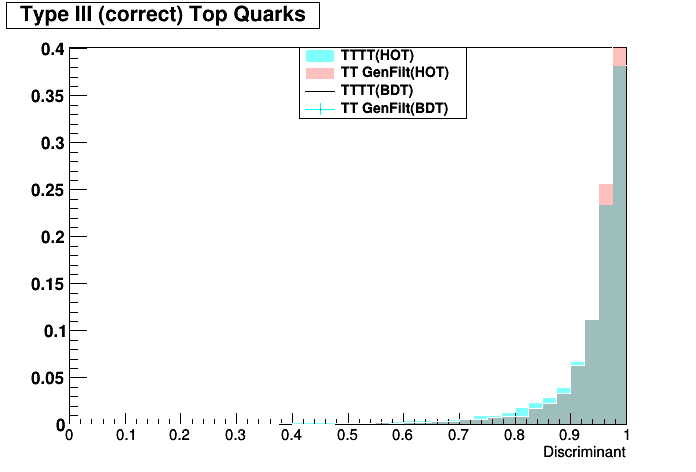

In [24]:
c14.cd()
h25s.SetFillColorAlpha(cols1, alphaS)
h25b.SetFillColorAlpha(colb1, alphaB)
h25s.SetLineColor(0)
h25b.SetLineColor(0)
#h25b.SetMarkerStyle(0)
h25s.DrawNormalized()
h25b.DrawNormalized("Same")
print("Signal Entries: " + str(h25s.GetEntries()) + "\t\tBackground Entries: " + str(h25b.GetEntries()))
DiscLeg.Draw()
c14.Update()
c14.Draw()

Signal Entries: 2975.0		Background Entries: 0.0


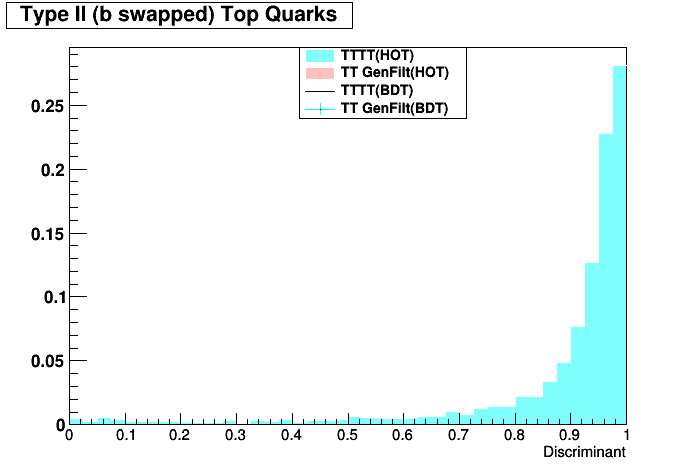

In [25]:
c15.cd()
h26s.SetFillColorAlpha(cols1, alphaS)
h26b.SetFillColorAlpha(colb1, alphaB)
h26s.SetLineColor(0)
h26b.SetLineColor(0)
h26b.SetMarkerStyle(5)
h26s.DrawNormalized()
#h26b.Draw("Same")
print("Signal Entries: " + str(h26s.GetEntries()) + "\t\tBackground Entries: " + str(h26b.GetEntries()))
DiscLeg.Draw()
c15.Update()
c15.Draw()

Signal Entries: 6984.0		Background Entries: 0.0


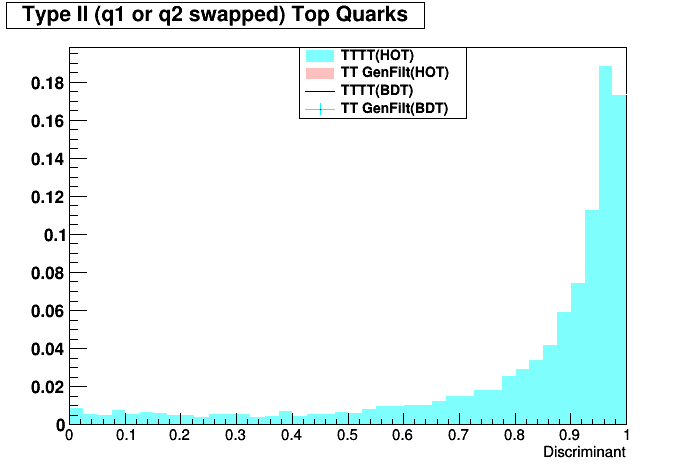

In [26]:
c16.cd()
h27s.SetFillColorAlpha(cols1, alphaS)
h27b.SetFillColorAlpha(colb1, alphaB)
h27s.SetLineColor(0)
h27b.SetLineColor(0)
h27b.SetMarkerStyle(5)
h27s.DrawNormalized()
#h27b.DrawNormalized("Same")
print("Signal Entries: " + str(h27s.GetEntries()) + "\t\tBackground Entries: " + str(h27b.GetEntries()))
DiscLeg.Draw()
c16.Update()
c16.Draw()

Signal Entries: 8812.0		Background Entries: 3040.0


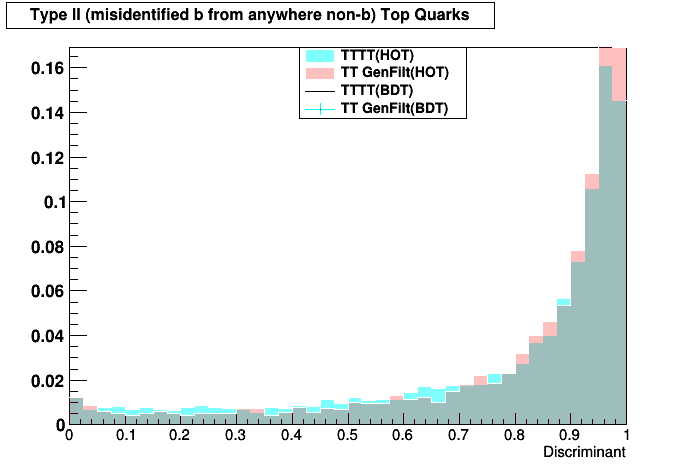

In [27]:
c17.cd()
h28s.SetFillColorAlpha(cols1, alphaS)
h28b.SetFillColorAlpha(colb1, alphaB)
h28s.SetLineColor(0)
h28b.SetLineColor(0)
h28b.SetMarkerStyle(5)
h28s.DrawNormalized()
h28b.DrawNormalized("Same")
print("Signal Entries: " + str(h28s.GetEntries()) + "\t\tBackground Entries: " + str(h28b.GetEntries()))
DiscLeg.Draw()
c17.Update()
c17.Draw()

Signal Entries: 16649.0		Background Entries: 6609.0


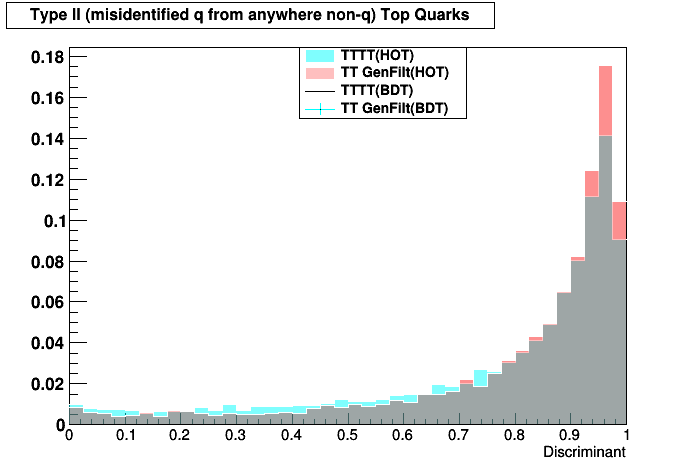

In [28]:
c18.cd()
h29s.SetFillColorAlpha(cols1, alphaS)
h29b.SetFillColorAlpha(colb1, alphaB)
h29s.SetLineColor(0)
h29b.SetLineColor(0)
h29b.SetMarkerStyle(5)
h29b.DrawNormalized()
h29s.DrawNormalized("Same")
h29b.DrawNormalized("Same")
print("Signal Entries: " + str(h29s.GetEntries()) + "\t\tBackground Entries: " + str(h29b.GetEntries()))
DiscLeg.Draw()
c18.Update()
c18.Draw()

Signal Entries: 1257.0		Background Entries: 0.0


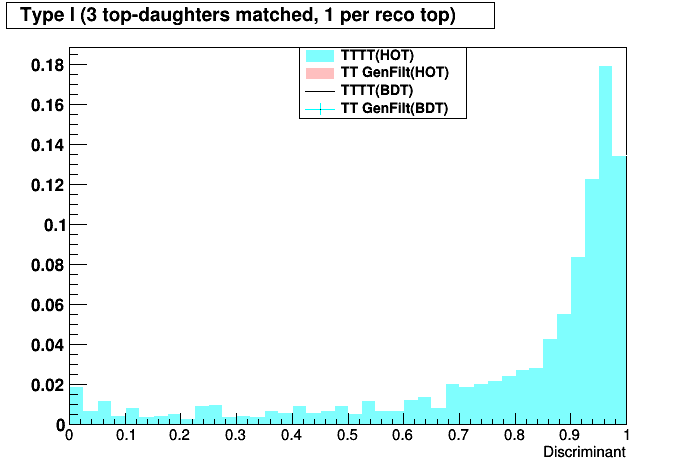

In [29]:
c19.cd()
h30s.SetFillColorAlpha(cols1, alphaS)
h30b.SetFillColorAlpha(colb1, alphaB)
h30s.SetLineColor(0)
h30b.SetLineColor(0)
h30b.SetMarkerStyle(5)
h30s.DrawNormalized()
#h30b.DrawNormalized("Same")
print("Signal Entries: " + str(h30s.GetEntries()) + "\t\tBackground Entries: " + str(h30b.GetEntries()))
DiscLeg.Draw()
c19.Update()
c19.Draw()

Signal Entries: 9988.0		Background Entries: 0.0


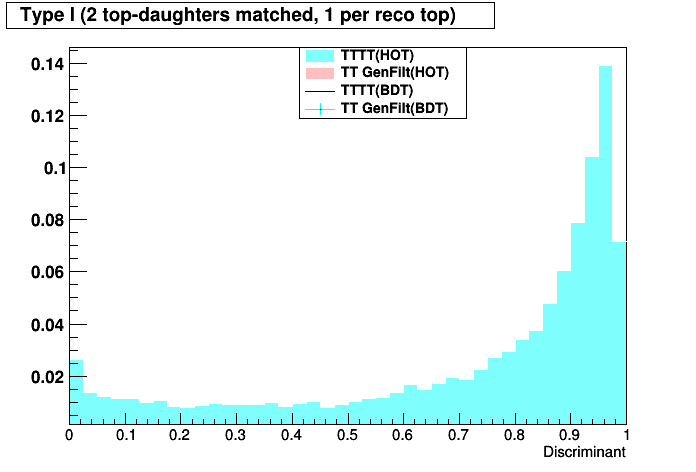

In [30]:
c20.cd()
h31s.SetFillColorAlpha(cols1, alphaS)
h31b.SetFillColorAlpha(colb1, alphaB)
h31s.SetLineColor(0)
h31b.SetLineColor(0)
h31b.SetMarkerStyle(5)
h31s.DrawNormalized()
#h31b.DrawNormalized("Same")
print("Signal Entries: " + str(h31s.GetEntries()) + "\t\tBackground Entries: " + str(h31b.GetEntries()))
DiscLeg.Draw()
c20.Update()
c20.Draw()

Signal Entries: 27027.0		Background Entries: 29912.0


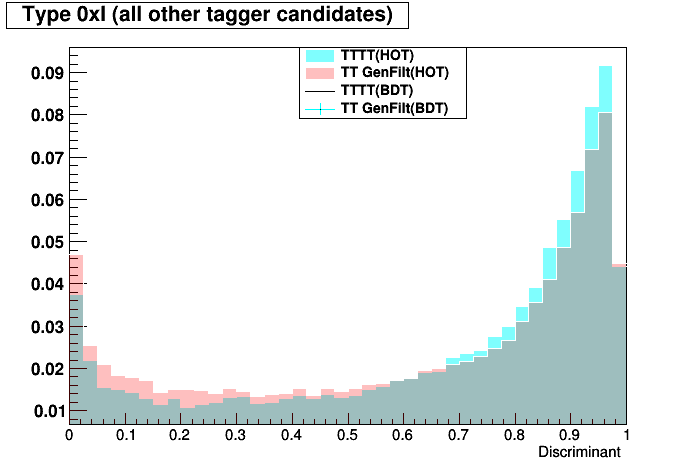

In [31]:
c21.cd()
h32s.SetFillColorAlpha(cols1, alphaS)
h32b.SetFillColorAlpha(colb1, alphaB)
h32s.SetLineColor(0)
h32b.SetLineColor(0)
h32b.SetMarkerStyle(5)
h32s.DrawNormalized()
h32b.DrawNormalized("Same")
print("Signal Entries: " + str(h32s.GetEntries()) + "\t\tBackground Entries: " + str(h32b.GetEntries()))
DiscLeg.Draw()
c21.Update()
c21.Draw()

In [32]:
s_hot_N1_sum = signal.h_eventN1_sum_hot
s_hot_N1_3 = signal.h_eventN1_tIII_hot#;1	Highest Disc Cand (Type III) 
s_hot_N1_2 = signal.h_eventN1_tII_hot#;1	Highest Disc Cand (Type II) 
s_hot_N1_1 = signal.h_eventN1_tItp_hot#;1	Highest Disc Cand (Type Itp) 
s_hot_N1_0 = signal.h_eventN1_t0x1_hot#;1	Highest Disc Cand (Type 0x1) 

b_hot_N1_sum = bkgd.h_eventN1_sum_hot
b_hot_N1_3 = bkgd.h_eventN1_tIII_hot#;1	Highest Disc Cand (Type III) 
b_hot_N1_2 = bkgd.h_eventN1_tII_hot#;1	Highest Disc Cand (Type II) 
b_hot_N1_1 = bkgd.h_eventN1_tItp_hot#;1	Highest Disc Cand (Type Itp) 
b_hot_N1_0 = bkgd.h_eventN1_t0x1_hot#;1	Highest Disc Cand (Type 0x1) 

s_bdt_N1_sum = signal.h_eventN1_sum_bdt
s_bdt_N1_3 = signal.h_eventN1_tIII_bdt#;1	Highest Disc Cand (Type III) 
s_bdt_N1_2 = signal.h_eventN1_tII_bdt#;1	Highest Disc Cand (Type II) 
s_bdt_N1_1 = signal.h_eventN1_tItp_bdt#;1	Highest Disc Cand (Type Itp) 
s_bdt_N1_0 = signal.h_eventN1_t0x1_bdt#;1	Highest Disc Cand (Type 0x1) 

b_bdt_N1_sum = bkgd.h_eventN1_sum_bdt
b_bdt_N1_3 = bkgd.h_eventN1_tIII_bdt#;1	Highest Disc Cand (Type III) 
b_bdt_N1_2 = bkgd.h_eventN1_tII_bdt#;1	Highest Disc Cand (Type II) 
b_bdt_N1_1 = bkgd.h_eventN1_tItp_bdt#;1	Highest Disc Cand (Type Itp) 
b_bdt_N1_0 = bkgd.h_eventN1_t0x1_bdt#;1	Highest Disc Cand (Type 0x1) 

h33s = s_hot_N1_3.ProjectionX("s_hot_N1_3_px")
h34s = s_hot_N1_2.ProjectionX("s_hot_N1_2_px")
h35s = s_hot_N1_1.ProjectionX("s_hot_N1_1_px")
h36s = s_hot_N1_0.ProjectionX("s_hot_N1_0_px")

h33b = b_hot_N1_3.ProjectionX("b_hot_N1_3_px")
h34b = b_hot_N1_2.ProjectionX("b_hot_N1_2_px")
h35b = b_hot_N1_1.ProjectionX("b_hot_N1_1_px")
h36b = b_hot_N1_0.ProjectionX("b_hot_N1_0_px")

h33s2 = s_bdt_N1_3.ProjectionX("s_bdt_N1_3_px")
h34s2 = s_bdt_N1_2.ProjectionX("s_bdt_N1_2_px")
h35s2 = s_bdt_N1_1.ProjectionX("s_bdt_N1_1_px")
h36s2 = s_bdt_N1_0.ProjectionX("s_bdt_N1_0_px")

h33b2 = b_bdt_N1_3.ProjectionX("b_bdt_N1_3_px")
h34b2 = b_bdt_N1_2.ProjectionX("b_bdt_N1_2_px")
h35b2 = b_bdt_N1_1.ProjectionX("b_bdt_N1_1_px")
h36b2 = b_bdt_N1_0.ProjectionX("b_bdt_N1_0_px")

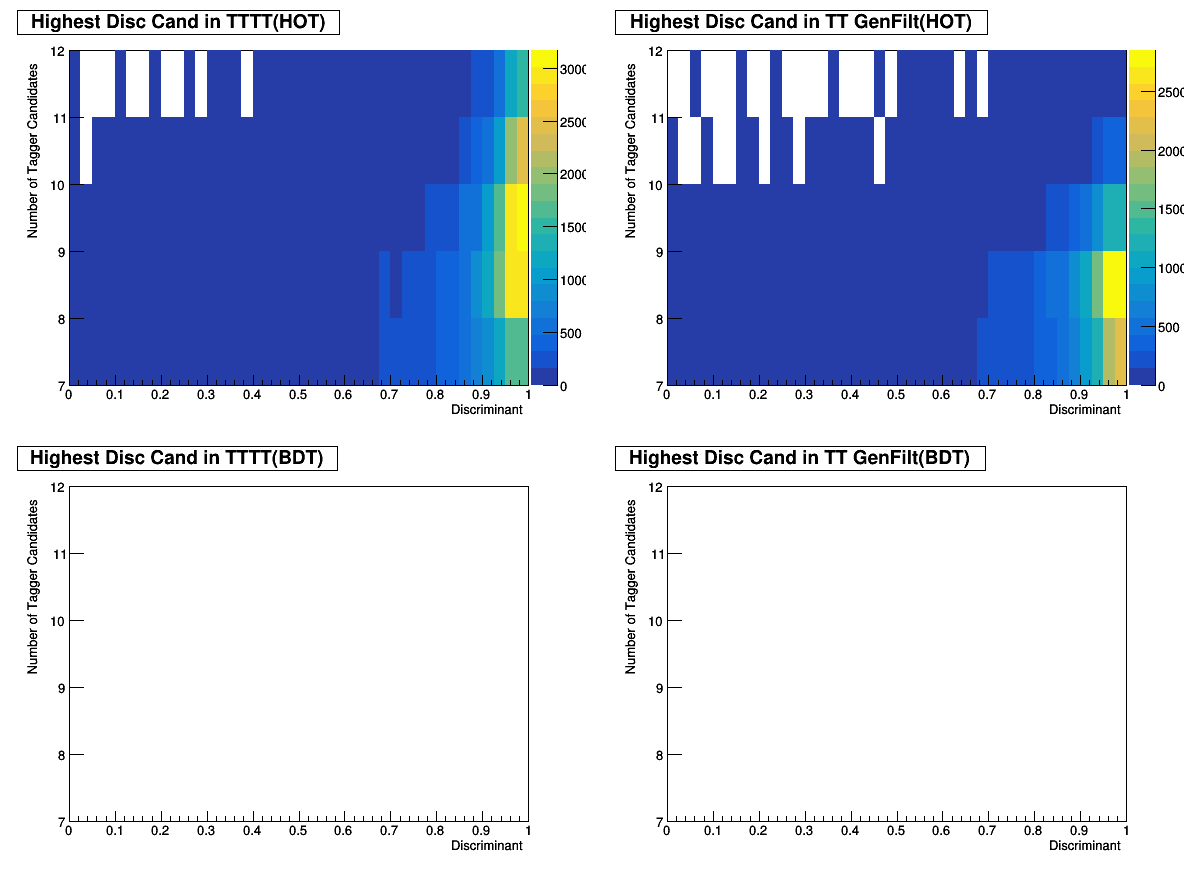

In [33]:
cN1_JC = ROOT.TCanvas("cN1_JC","Disc vs nJet of highest tagger candidates", 1200, 900)
cN1_JC.Divide(2,2)
cN1_JC.cd(1)
s_hot_N1_sum.SetTitle("Highest Disc Cand in " + leg1)
s_hot_N1_sum.SetNdivisions(5, "Y")
s_hot_N1_sum.Draw("COLZ")
cN1_JC.cd(2)
b_hot_N1_sum.SetTitle("Highest Disc Cand in " + leg2)
b_hot_N1_sum.SetNdivisions(5, "Y")
b_hot_N1_sum.Draw("COLZ")
cN1_JC.cd(3)
s_bdt_N1_sum.SetTitle("Highest Disc Cand in " + leg3)
s_bdt_N1_sum.SetNdivisions(5, "Y")
s_bdt_N1_sum.Draw("COLZ")
cN1_JC.cd(4)
b_bdt_N1_sum.SetTitle("Highest Disc Cand in " + leg4)
b_bdt_N1_sum.SetNdivisions(5, "Y")
b_bdt_N1_sum.Draw("COLZ")
cN1_JC.Update()
cN1_JC.Draw()


TTTT(HOT) entries: 10401.0	TT GenFilt(HOT) entries: 10816.0
TTTT(HOT) entries: 23854.0	TT GenFilt(HOT) entries: 23150.0
TTTT(HOT) entries: 24959.0	TT GenFilt(HOT) entries: 17503.0
TTTT(HOT) entries: 25566.0	TT GenFilt(HOT) entries: 7223.0


Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: s_bdt_N2_7J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: b_bdt_N2_7J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: s_bdt_N1_8J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: b_bdt_N1_8J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: s_bdt_N1_9J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: b_bdt_N1_9J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: s_bdt_N1_10+J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: b_bdt_N1_10+J


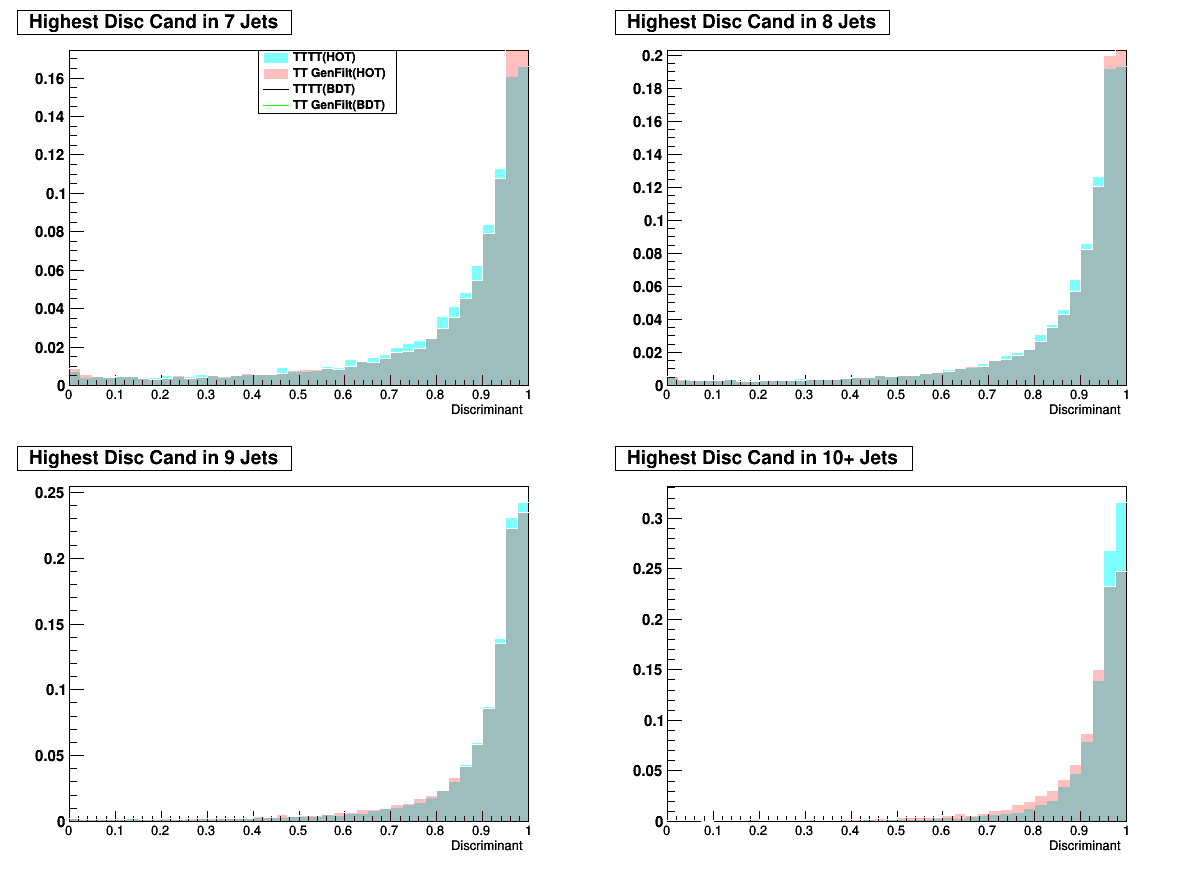

In [34]:
N1Normalize = True

cN1_JP = ROOT.TCanvas("cN1_JP", "Profile (Disc vs nJet) of highest tagger candidates", 1200, 900)
cN1_JP.Divide(2,2)
cN1_JP.cd(1)
s_hot_N1_7J = s_hot_N1_sum.ProjectionX("s_hot_N1_7J", 0, 1)
s_hot_N1_7J.SetTitle("Highest Disc Cand in 7 Jets")
s_hot_N1_7J.SetLineColor(0)
s_hot_N1_7J.SetFillColorAlpha(cols1, alphaS)
b_hot_N1_7J = b_hot_N1_sum.ProjectionX("b_hot_N2_7J", 0, 1)
b_hot_N1_7J.SetLineColor(0)
b_hot_N1_7J.SetFillColorAlpha(colb1, alphaB)
s_bdt_N1_7J = s_bdt_N1_sum.ProjectionX("s_bdt_N2_7J", 0, 1)
s_bdt_N1_7J.SetLineColor(cols2)
b_bdt_N1_7J = b_bdt_N1_sum.ProjectionX("b_bdt_N2_7J", 0, 1)
b_bdt_N1_7J.SetLineColor(colb2)
if N1Normalize:
    s_hot_N1_7J.DrawNormalized()
    b_hot_N1_7J.DrawNormalized("SAME")
    s_bdt_N1_7J.DrawNormalized("SAME")
    b_bdt_N1_7J.DrawNormalized("SAME")
else:
    s_hot_N1_7J.Draw()
    b_hot_N1_7J.Draw("SAME")
    s_bdt_N1_7J.Draw("SAME")
    b_bdt_N1_7J.Draw("SAME")
    
#Set Legend for all histograms concurrently
cN1_Leg = ROOT.TLegend(0.43, 0.75, 0.67, 0.90)
cN1_Leg.AddEntry(s_hot_N1_7J,leg1,"f")
cN1_Leg.AddEntry(b_hot_N1_7J,leg2,"f")
cN1_Leg.AddEntry(s_bdt_N1_7J,leg3,"l")
cN1_Leg.AddEntry(b_bdt_N1_7J,leg4,"l")
cN1_Leg.Draw()

cN1_JP.cd(2)
s_hot_N1_8J = s_hot_N1_sum.ProjectionX("s_hot_N1_8J", 1, 2)
s_hot_N1_8J.SetTitle("Highest Disc Cand in 8 Jets")
s_hot_N1_8J.SetLineColor(0)
s_hot_N1_8J.SetFillColorAlpha(cols1, alphaS)
b_hot_N1_8J = b_hot_N1_sum.ProjectionX("b_hot_N1_8J", 1, 2)
b_hot_N1_8J.SetLineColor(0)
b_hot_N1_8J.SetFillColorAlpha(colb1, alphaB)
s_bdt_N1_8J = s_bdt_N1_sum.ProjectionX("s_bdt_N1_8J", 1, 2)
s_bdt_N1_8J.SetLineColor(cols2)
b_bdt_N1_8J = b_bdt_N1_sum.ProjectionX("b_bdt_N1_8J", 1, 2)
b_bdt_N1_8J.SetLineColor(colb2)
if N1Normalize:
    s_hot_N1_8J.DrawNormalized()
    b_hot_N1_8J.DrawNormalized("SAME")
    s_bdt_N1_8J.DrawNormalized("SAME")
    b_bdt_N1_8J.DrawNormalized("SAME")
else:
    s_hot_N1_8J.Draw()
    b_hot_N1_8J.Draw("SAME")
    s_bdt_N1_8J.Draw("SAME")
    b_bdt_N1_8J.Draw("SAME")

cN1_JP.cd(3)
s_hot_N1_9J = s_hot_N1_sum.ProjectionX("s_hot_N1_9J", 2, 3)
s_hot_N1_9J.SetTitle("Highest Disc Cand in 9 Jets")
s_hot_N1_9J.SetLineColor(0)
s_hot_N1_9J.SetFillColorAlpha(cols1, alphaS)
b_hot_N1_9J = b_hot_N1_sum.ProjectionX("b_hot_N1_9J", 2, 3)
b_hot_N1_9J.SetLineColor(0)
b_hot_N1_9J.SetFillColorAlpha(colb1, alphaB)
s_bdt_N1_9J = s_bdt_N1_sum.ProjectionX("s_bdt_N1_9J", 2, 3)
s_bdt_N1_9J.SetLineColor(cols2)
b_bdt_N1_9J = b_bdt_N1_sum.ProjectionX("b_bdt_N1_9J", 2, 3)
b_bdt_N1_9J.SetLineColor(colb2)
if N1Normalize:
    s_hot_N1_9J.DrawNormalized()
    b_hot_N1_9J.DrawNormalized("SAME")
    s_bdt_N1_9J.DrawNormalized("SAME")
    b_bdt_N1_9J.DrawNormalized("SAME")
else:
    s_hot_N1_9J.Draw()
    b_hot_N1_9J.Draw("SAME")
    s_bdt_N1_9J.Draw("SAME")
    b_bdt_N1_9J.Draw("SAME")

cN1_JP.cd(4)
s_hot_N1_10pJ = s_hot_N1_sum.ProjectionX("s_hot_N1_10+J", 3, 7)
s_hot_N1_10pJ.SetTitle("Highest Disc Cand in 10+ Jets")
s_hot_N1_10pJ.SetLineColor(0)
s_hot_N1_10pJ.SetFillColorAlpha(cols1, alphaS)
b_hot_N1_10pJ = b_hot_N1_sum.ProjectionX("b_hot_N1_10+J", 3, 7)
b_hot_N1_10pJ.SetLineColor(0)
b_hot_N1_10pJ.SetFillColorAlpha(colb1, alphaB)
s_bdt_N1_10pJ = s_bdt_N1_sum.ProjectionX("s_bdt_N1_10+J", 3, 7)
s_bdt_N1_10pJ.SetLineColor(cols2)
b_bdt_N1_10pJ = b_bdt_N1_sum.ProjectionX("b_bdt_N1_10+J", 3, 7)
b_bdt_N1_10pJ.SetLineColor(colb2)
if N1Normalize:
    s_hot_N1_10pJ.DrawNormalized()
    b_hot_N1_10pJ.DrawNormalized("SAME")
    s_bdt_N1_10pJ.DrawNormalized("SAME")
    b_bdt_N1_10pJ.DrawNormalized("SAME")
else:
    s_hot_N1_10pJ.Draw()
    b_hot_N1_10pJ.Draw("SAME")
    s_bdt_N1_10pJ.Draw("SAME")
    b_bdt_N1_10pJ.Draw("SAME")
cN1_JP.Update()
cN1_JP.Draw()

print(leg1 + " entries: " + str(s_hot_N1_7J.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N1_7J.GetEntries()))
print(leg1 + " entries: " + str(s_hot_N1_8J.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N1_8J.GetEntries()))
print(leg1 + " entries: " + str(s_hot_N1_9J.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N1_9J.GetEntries()))
print(leg1 + " entries: " + str(s_hot_N1_10pJ.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N1_10pJ.GetEntries()))

Signal Entries: 12880.0		Background Entries: 9612.0


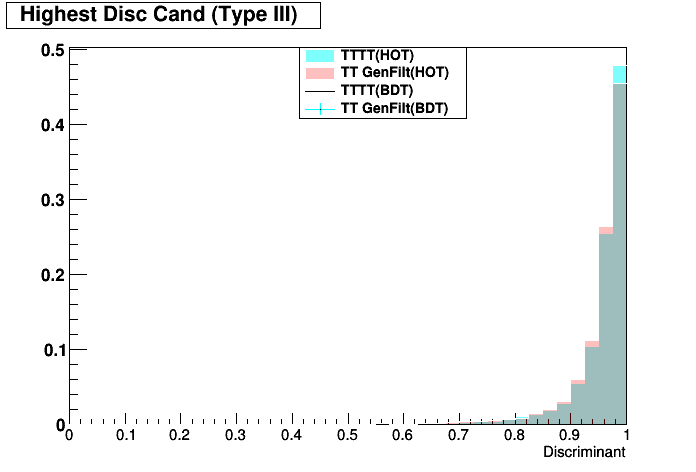

In [35]:
c22.cd()
h33s.SetFillColorAlpha(cols1, alphaS)
h33b.SetFillColorAlpha(colb1, alphaB)
h33s.SetLineColor(0)
h33b.SetLineColor(0)
h33b.SetMarkerStyle(0)
h33s.DrawNormalized()
h33b.DrawNormalized("Same")
print("Signal Entries: " + str(h33s.GetEntries()) + "\t\tBackground Entries: " + str(h33b.GetEntries()))
DiscLeg.Draw()
c22.Update()
c22.Draw()

Signal Entries: 19963.0		Background Entries: 7731.0


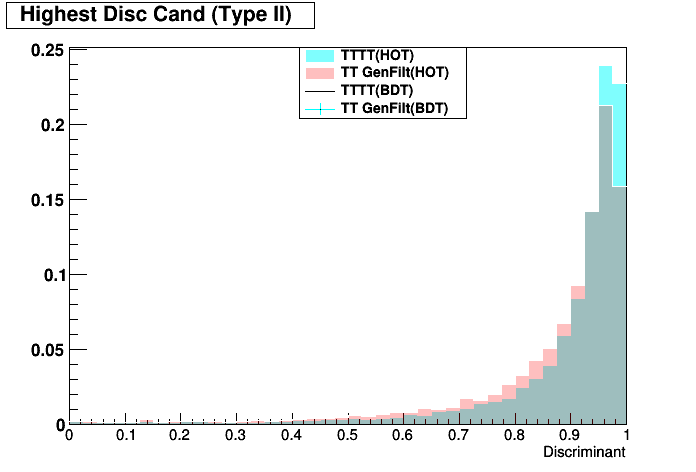

In [36]:
c23.cd()
h34s.SetFillColorAlpha(cols1, alphaS)
h34b.SetFillColorAlpha(colb1, alphaB)
h34s.SetLineColor(0)
h34b.SetLineColor(0)
h34b.SetMarkerStyle(5)
h34s.DrawNormalized()
h34b.DrawNormalized("Same")
print("Signal Entries: " + str(h34s.GetEntries()) + "\t\tBackground Entries: " + str(h34b.GetEntries()))
DiscLeg.Draw()
c23.Update()
c23.Draw()

Signal Entries: 5753.0		Background Entries: 0.0


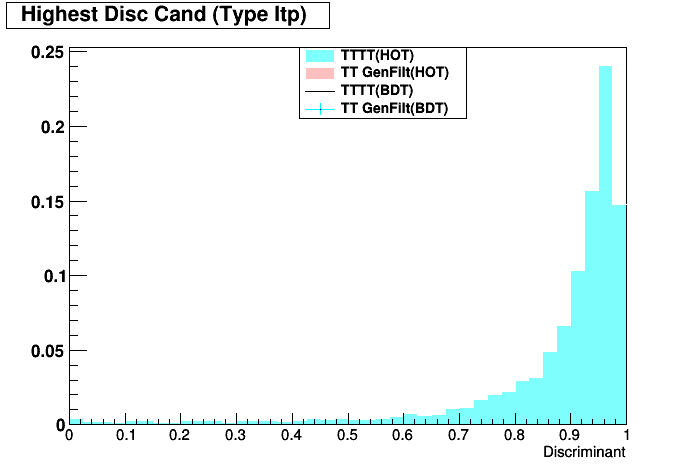

In [37]:
c24.cd()
h35s.SetFillColorAlpha(cols1, alphaS)
h35b.SetFillColorAlpha(colb1, alphaB)
h35s.SetLineColor(0)
h35b.SetLineColor(0)
h35b.SetMarkerStyle(5)
h35s.DrawNormalized()
#h35b.DrawNormalized("Same")
print("Signal Entries: " + str(h35s.GetEntries()) + "\t\tBackground Entries: " + str(h35b.GetEntries()))
DiscLeg.Draw()
c24.Update()
c24.Draw()

Signal Entries: 10824.0		Background Entries: 13030.0


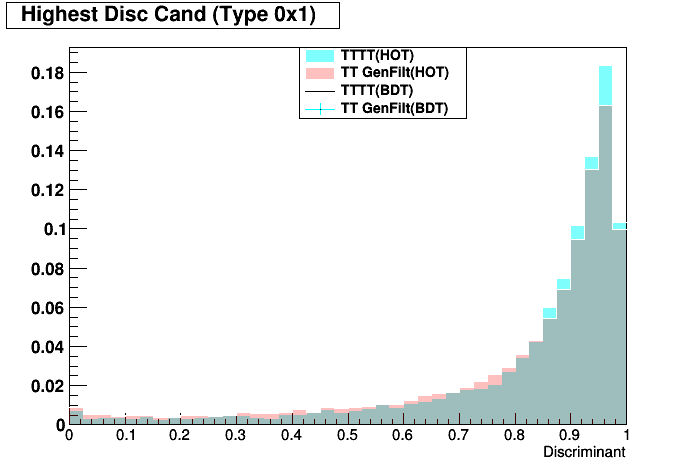

In [38]:
c25.cd()
h36s.SetFillColorAlpha(cols1, alphaS)
h36b.SetFillColorAlpha(colb1, alphaB)
h36s.SetLineColor(0)
h36b.SetLineColor(0)
h36b.SetMarkerStyle(5)
h36s.DrawNormalized()
h36b.DrawNormalized("Same")
print("Signal Entries: " + str(h36s.GetEntries()) + "\t\tBackground Entries: " + str(h36b.GetEntries()))
DiscLeg.Draw()
c25.Update()
c25.Draw()

Signal Entries: 49420.0		Background Entries: 30373.0


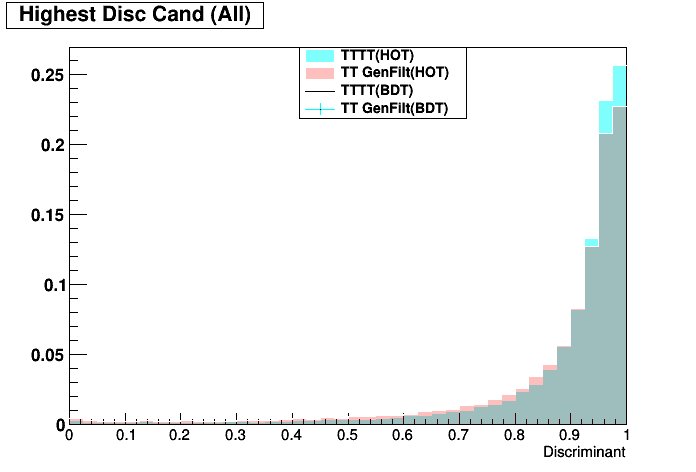

In [39]:
N1Ssum = h33s + h34s + h35s + h36s
N1Bsum = h33b + h34b + h35b + h36b
N1Ssum.SetTitle("Highest Disc Cand (All)")
N1Ssum.SetFillColorAlpha(cols1, alphaS)
N1Bsum.SetFillColorAlpha(colb1, alphaB)
N1Ssum.SetLineColor(0)
N1Bsum.SetLineColor(0)
cN1.cd()
print("Signal Entries: " + str(N1Ssum.GetEntries()) + "\t\tBackground Entries: " + str(N1Bsum.GetEntries()))
N1Ssum.DrawNormalized()
N1Bsum.DrawNormalized("Same")
DiscLeg.Draw()
cN1.Update()
cN1.Draw()

In [40]:
s_hot_N2_sum = signal.h_eventN2_sum_hot
s_hot_N2_3 = signal.h_eventN2_tIII_hot#;1	Highest Disc Cand (Type III) 
s_hot_N2_2 = signal.h_eventN2_tII_hot#;1	Highest Disc Cand (Type II) 
s_hot_N2_1 = signal.h_eventN2_tItp_hot#;1	Highest Disc Cand (Type Itp) 
s_hot_N2_0 = signal.h_eventN2_t0x1_hot#;1	Highest Disc Cand (Type 0x1) 

b_hot_N2_sum = bkgd.h_eventN2_sum_hot
b_hot_N2_3 = bkgd.h_eventN2_tIII_hot#;1	Highest Disc Cand (Type III) 
b_hot_N2_2 = bkgd.h_eventN2_tII_hot#;1	Highest Disc Cand (Type II) 
b_hot_N2_1 = bkgd.h_eventN2_tItp_hot#;1	Highest Disc Cand (Type Itp) 
b_hot_N2_0 = bkgd.h_eventN2_t0x1_hot#;1	Highest Disc Cand (Type 0x1)

s_bdt_N2_sum = signal.h_eventN2_sum_bdt
s_bdt_N2_3 = signal.h_eventN2_tIII_bdt#;1	Highest Disc Cand (Type III) 
s_bdt_N2_2 = signal.h_eventN2_tII_bdt#;1	Highest Disc Cand (Type II) 
s_bdt_N2_1 = signal.h_eventN2_tItp_bdt#;1	Highest Disc Cand (Type Itp) 
s_bdt_N2_0 = signal.h_eventN2_t0x1_bdt#;1	Highest Disc Cand (Type 0x1)

b_bdt_N2_sum = bkgd.h_eventN2_sum_bdt
b_bdt_N2_3 = bkgd.h_eventN2_tIII_bdt#;1	Highest Disc Cand (Type III) 
b_bdt_N2_2 = bkgd.h_eventN2_tII_bdt#;1	Highest Disc Cand (Type II) 
b_bdt_N2_1 = bkgd.h_eventN2_tItp_bdt#;1	Highest Disc Cand (Type Itp) 
b_bdt_N2_0 = bkgd.h_eventN2_t0x1_bdt#;1	Highest Disc Cand (Type 0x1)

h37s = s_hot_N2_3.ProjectionX("s_hot_N2_3_px")
h38s = s_hot_N2_2.ProjectionX("s_hot_N2_2_px")
h39s = s_hot_N2_1.ProjectionX("s_hot_N2_1_px")
h40s = s_hot_N2_0.ProjectionX("s_hot_N2_0_px")

h37b = b_hot_N2_3.ProjectionX("b_hot_N2_3_px")
h38b = b_hot_N2_2.ProjectionX("b_hot_N2_2_px")
h39b = b_hot_N2_1.ProjectionX("b_hot_N2_1_px")
h40b = b_hot_N2_0.ProjectionX("b_hot_N2_0_px")

h37s2 = s_bdt_N2_3.ProjectionX("s_bdt_N2_3_px")
h38s2 = s_bdt_N2_2.ProjectionX("s_bdt_N2_2_px")
h39s2 = s_bdt_N2_1.ProjectionX("s_bdt_N2_1_px")
h40s2 = s_bdt_N2_0.ProjectionX("s_bdt_N2_0_px")

h37b2 = b_bdt_N2_3.ProjectionX("b_bdt_N2_3_px")
h38b2 = b_bdt_N2_2.ProjectionX("b_bdt_N2_2_px")
h39b2 = b_bdt_N2_1.ProjectionX("b_bdt_N2_1_px")
h40b2 = b_bdt_N2_0.ProjectionX("b_bdt_N2_0_px")

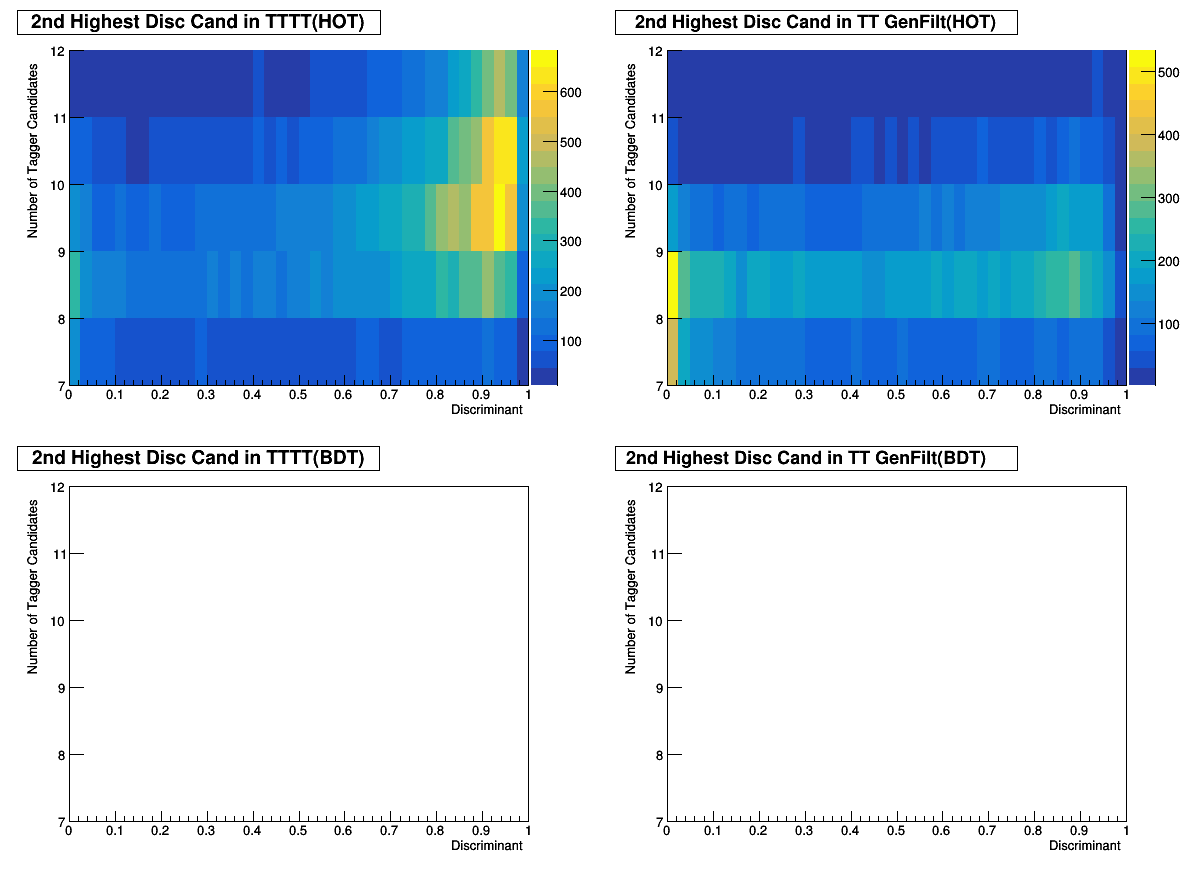

In [41]:
cN2_JC = ROOT.TCanvas("cN2_JC", "Disc vs nJet of 2nd highest tagger candidates", 1200, 900)
cN2_JC.Divide(2,2)
cN2_JC.cd(1)
s_hot_N2_sum.SetTitle("2nd Highest Disc Cand in " + leg1)
s_hot_N2_sum.SetNdivisions(5, "Y")
s_hot_N2_sum.Draw("COLZ")
cN2_JC.cd(2)
b_hot_N2_sum.SetTitle("2nd Highest Disc Cand in " + leg2)
b_hot_N2_sum.SetNdivisions(5, "Y")
b_hot_N2_sum.Draw("COLZ")
cN2_JC.cd(3)
s_bdt_N2_sum.SetTitle("2nd Highest Disc Cand in " + leg3)
s_bdt_N2_sum.SetNdivisions(5, "Y")
s_bdt_N2_sum.Draw("COLZ")
cN2_JC.cd(4)
b_bdt_N2_sum.SetTitle("2nd Highest Disc Cand in " + leg4)
b_bdt_N2_sum.SetNdivisions(5, "Y")
b_bdt_N2_sum.Draw("COLZ")
cN2_JC.Update()
cN2_JC.Draw()


TTTT(HOT) entries: 3158.0	TT GenFilt(HOT) entries: 3781.0
TTTT(HOT) entries: 11254.0	TT GenFilt(HOT) entries: 11768.0
TTTT(HOT) entries: 17212.0	TT GenFilt(HOT) entries: 12252.0
TTTT(HOT) entries: 22217.0	TT GenFilt(HOT) entries: 6187.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cN2_JP
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: s_bdt_N2_7J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: b_bdt_N2_7J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: s_bdt_N2_8J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: b_bdt_N2_8J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: s_bdt_N2_9J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: b_bdt_N2_9J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: s_bdt_N2_10+J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: b_bdt_N2_10+J
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cN2_EFF


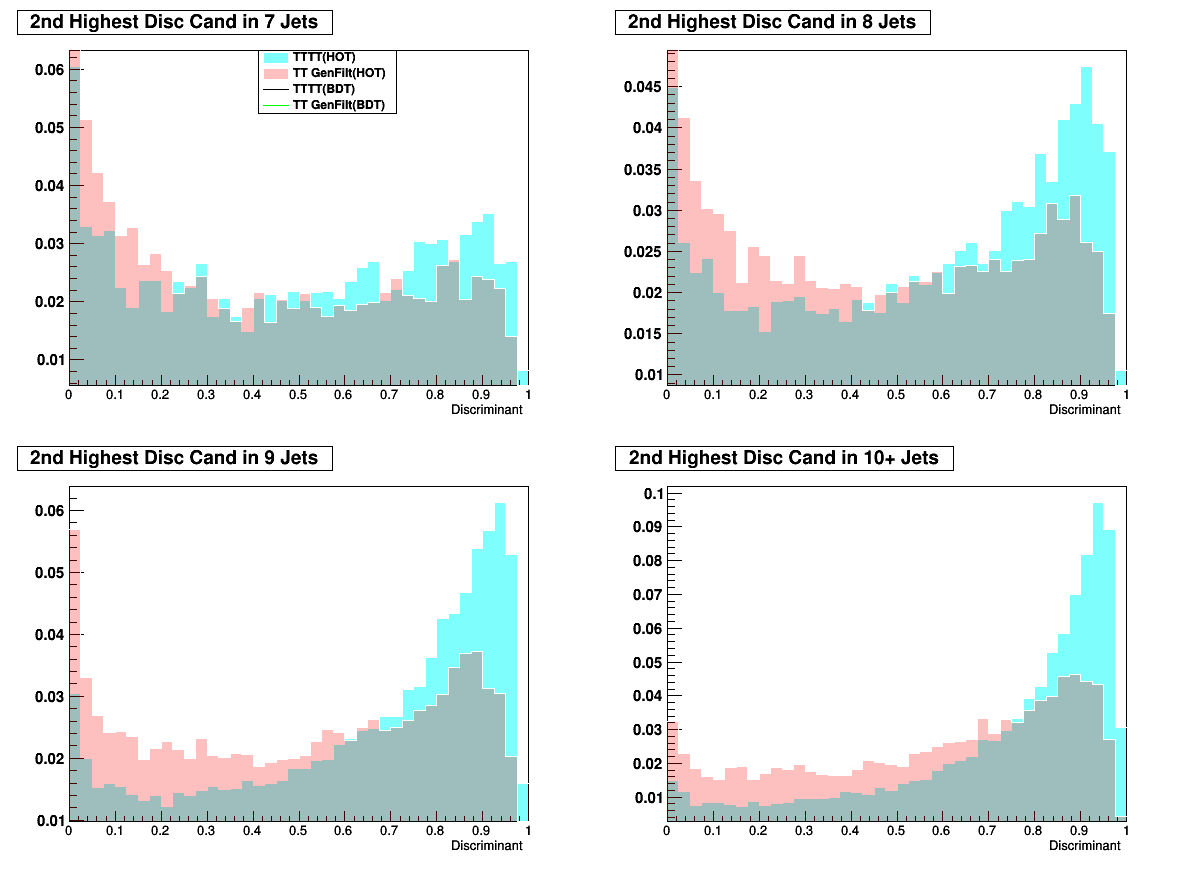

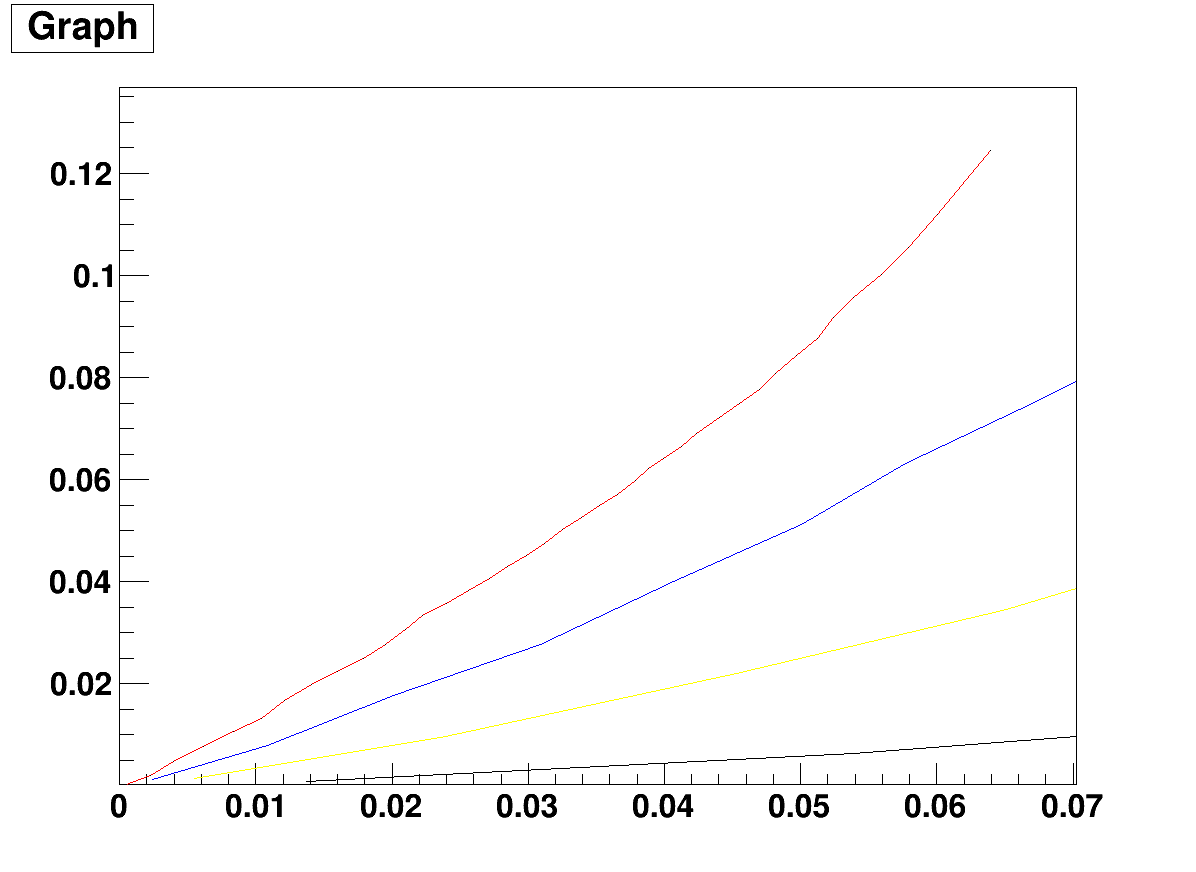

In [72]:
N2Normalize = True

cN2_JP = ROOT.TCanvas("cN2_JP", "Profile (Disc vs nJet) of 2nd highest tagger candidates", 1200, 900)
cN2_JP.Divide(2,2)
cN2_JP.cd(1)
s_hot_N2_7J = s_hot_N2_sum.ProjectionX("s_hot_N2_7J", 0, 1)
s_hot_N2_7J.SetTitle("2nd Highest Disc Cand in 7 Jets")
s_hot_N2_7J.SetLineColor(0)
s_hot_N2_7J.SetFillColorAlpha(cols1, alphaS)
b_hot_N2_7J = b_hot_N2_sum.ProjectionX("b_hot_N2_7J", 0, 1)
b_hot_N2_7J.SetLineColor(0)
b_hot_N2_7J.SetFillColorAlpha(colb1, alphaB)
s_bdt_N2_7J = s_bdt_N2_sum.ProjectionX("s_bdt_N2_7J", 0, 1)
s_bdt_N2_7J.SetLineColor(cols2)
b_bdt_N2_7J = b_bdt_N2_sum.ProjectionX("b_bdt_N2_7J", 0, 1)
b_bdt_N2_7J.SetLineColor(colb2)
if N2Normalize:
    s_hot_N2_7J.DrawNormalized()
    b_hot_N2_7J.DrawNormalized("SAME")
    s_bdt_N2_7J.DrawNormalized("SAME")
    b_bdt_N2_7J.DrawNormalized("SAME")
else:
    s_hot_N2_7J.Draw()
    b_hot_N2_7J.Draw("SAME")
    s_bdt_N2_7J.Draw("SAME")
    b_bdt_N2_7J.Draw("SAME")
    
#Set Legend for all histograms concurrently
cN2_Leg = ROOT.TLegend(0.43, 0.75, 0.67, 0.90)
cN2_Leg.AddEntry(s_hot_N2_7J,leg1,"f")
cN2_Leg.AddEntry(b_hot_N2_7J,leg2,"f")
cN2_Leg.AddEntry(s_bdt_N2_7J,leg3,"l")
cN2_Leg.AddEntry(b_bdt_N2_7J,leg4,"l")
cN2_Leg.Draw()

cN2_JP.cd(2)
s_hot_N2_8J = s_hot_N2_sum.ProjectionX("s_hot_N2_8J", 1, 2)
s_hot_N2_8J.SetTitle("2nd Highest Disc Cand in 8 Jets")
s_hot_N2_8J.SetLineColor(0)
s_hot_N2_8J.SetFillColorAlpha(cols1, alphaS)
b_hot_N2_8J = b_hot_N2_sum.ProjectionX("b_hot_N2_8J", 1, 2)
b_hot_N2_8J.SetLineColor(0)
b_hot_N2_8J.SetFillColorAlpha(colb1, alphaB)
s_bdt_N2_8J = s_bdt_N2_sum.ProjectionX("s_bdt_N2_8J", 1, 2)
s_bdt_N2_8J.SetLineColor(cols2)
b_bdt_N2_8J = b_bdt_N2_sum.ProjectionX("b_bdt_N2_8J", 1, 2)
b_bdt_N2_8J.SetLineColor(colb2)
if N2Normalize:
    s_hot_N2_8J.DrawNormalized()
    b_hot_N2_8J.DrawNormalized("SAME")
    s_bdt_N2_8J.DrawNormalized("SAME")
    b_bdt_N2_8J.DrawNormalized("SAME")
else:
    s_hot_N2_8J.Draw()
    b_hot_N2_8J.Draw("SAME")
    s_bdt_N2_8J.Draw("SAME")
    b_bdt_N2_8J.Draw("SAME")

cN2_JP.cd(3)
s_hot_N2_9J = s_hot_N2_sum.ProjectionX("s_hot_N2_9J", 2, 3)
s_hot_N2_9J.SetTitle("2nd Highest Disc Cand in 9 Jets")
s_hot_N2_9J.SetLineColor(0)
s_hot_N2_9J.SetFillColorAlpha(cols1, alphaS)
b_hot_N2_9J = b_hot_N2_sum.ProjectionX("b_hot_N2_9J", 2, 3)
b_hot_N2_9J.SetLineColor(0)
b_hot_N2_9J.SetFillColorAlpha(colb1, alphaB)
s_bdt_N2_9J = s_bdt_N2_sum.ProjectionX("s_bdt_N2_9J", 2, 3)
s_bdt_N2_9J.SetLineColor(cols2)
b_bdt_N2_9J = b_bdt_N2_sum.ProjectionX("b_bdt_N2_9J", 2, 3)
b_bdt_N2_9J.SetLineColor(colb2)
if N2Normalize:
    s_hot_N2_9J.DrawNormalized()
    b_hot_N2_9J.DrawNormalized("SAME")
    s_bdt_N2_9J.DrawNormalized("SAME")
    b_bdt_N2_9J.DrawNormalized("SAME")
else:
    s_hot_N2_9J.Draw()
    b_hot_N2_9J.Draw("SAME")
    s_bdt_N2_9J.Draw("SAME")
    b_bdt_N2_9J.Draw("SAME")

cN2_JP.cd(4)
s_hot_N2_10pJ = s_hot_N2_sum.ProjectionX("s_hot_N2_10+J", 3, 7)
s_hot_N2_10pJ.SetTitle("2nd Highest Disc Cand in 10+ Jets")
s_hot_N2_10pJ.SetLineColor(0)
s_hot_N2_10pJ.SetFillColorAlpha(cols1, alphaS)
b_hot_N2_10pJ = b_hot_N2_sum.ProjectionX("b_hot_N2_10+J", 3, 7)
b_hot_N2_10pJ.SetLineColor(0)
b_hot_N2_10pJ.SetFillColorAlpha(colb1, alphaB)
s_bdt_N2_10pJ = s_bdt_N2_sum.ProjectionX("s_bdt_N2_10+J", 3, 7)
s_bdt_N2_10pJ.SetLineColor(cols2)
b_bdt_N2_10pJ = b_bdt_N2_sum.ProjectionX("b_bdt_N2_10+J", 3, 7)
b_bdt_N2_10pJ.SetLineColor(colb2)
if N2Normalize:
    s_hot_N2_10pJ.DrawNormalized()
    b_hot_N2_10pJ.DrawNormalized("SAME")
    s_bdt_N2_10pJ.DrawNormalized("SAME")
    b_bdt_N2_10pJ.DrawNormalized("SAME")
else:
    s_hot_N2_10pJ.Draw()
    b_hot_N2_10pJ.Draw("SAME")
    s_bdt_N2_10pJ.Draw("SAME")
    b_bdt_N2_10pJ.Draw("SAME")
cN2_JP.Update()
cN2_JP.Draw()
print(leg1 + " entries: " + str(s_hot_N2_7J.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N2_7J.GetEntries()))
print(leg1 + " entries: " + str(s_hot_N2_8J.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N2_8J.GetEntries()))
print(leg1 + " entries: " + str(s_hot_N2_9J.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N2_9J.GetEntries()))
print(leg1 + " entries: " + str(s_hot_N2_10pJ.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N2_10pJ.GetEntries()))

SignalEntries = signal.h_nTrueRecoTops.GetEntries() #Use ALL entries, even if no 2nd or 3rd candidate!
BkgdEntries = bkgd.h_nTrueRecoTops.GetEntries()
cN2_EFF = ROOT.TCanvas("cN2_EFF", "Background vs Signal Efficiency of 2nd highest tagger candidates", 1200, 900)
cN2_EFF.cd()
N2_pts = s_hot_N2_sum.GetNbinsX()+1
N2_grid = xrange(N2_pts)
N2_hot_7J_gr = ROOT.TGraph(N2_pts, 
                         array('d',[s_hot_N2_7J.Integral(x, -1)/49420 for x in N2_grid]), 
                         array('d',[b_hot_N2_7J.Integral(x, -1)/30373 for x in N2_grid])
                    )
N2_hot_7J_gr.SetLineColor(2)
N2_hot_8J_gr = ROOT.TGraph(N2_pts, 
                         array('d',[s_hot_N2_8J.Integral(x, -1)/49420 for x in N2_grid]), 
                         array('d',[b_hot_N2_8J.Integral(x, -1)/30373 for x in N2_grid])
                    )
N2_hot_8J_gr.SetLineColor(4)
N2_hot_9J_gr = ROOT.TGraph(N2_pts, 
                         array('d',[s_hot_N2_9J.Integral(x, -1)/49420 for x in N2_grid]), 
                         array('d',[b_hot_N2_9J.Integral(x, -1)/30373 for x in N2_grid])
                    )
N2_hot_9J_gr.SetLineColor(5)
N2_hot_10pJ_gr = ROOT.TGraph(N2_pts, 
                         array('d',[s_hot_N2_10pJ.Integral(x, -1)/49420 for x in N2_grid]), 
                         array('d',[b_hot_N2_10pJ.Integral(x, -1)/30373 for x in N2_grid])
                    )
N2_hot_10pJ_gr.SetLineColor(1)
N2_hot_7J_gr.Draw()
N2_hot_8J_gr.Draw("SAME")
N2_hot_9J_gr.Draw("SAME")
N2_hot_10pJ_gr.Draw("SAME")
cN2_EFF.Draw()


In [43]:
np22 = N2Ssum.GetNbinsX()+1
grid22 = xrange(np22)
#SInt22 = [N2Ssum.Integral(x, -1)/N2Ssum.Integral(0, -1) for x in grid22]
#BInt22 = [N2Bsum.Integral(x, -1)/N2Bsum.Integral(0, -1) for x in grid22]
SInt22 = [N2Ssum.Integral(x, -1)/49420 for x in grid22]
BInt22 = [N2Bsum.Integral(x, -1)/30373 for x in grid22]
ROC2gr = ROOT.TGraph(len(SInt22), array('d',SInt22), array('d',BInt22))
ROC2gr.SetLineColor(2)
ROC2.Reset()
for x in grid22:
    ROC2.Fill(SInt22[x], BInt22[x])
    #ROC2.SetBinContent(x, SepPow2[x])
cROC2.cd()
ROC2.Draw()
ROC2gr.Draw("SAME")
cROC2.Update()
cROC2.Draw()

In [44]:
#Method 0
nJB = s_hot_N1_sum.GetNbinsY()
print(nJB)
N2ArrayS1 = []
N2ArrayB1 = []
cN2Array = []
cN2ArrayLeg = []
#cN2ArrayLeg = ROOT.TLegend(0.43, 0.75, 0.67, 0.90)
#DiscLeg.SetHeader("The Legend Title","C") # option "C" allows to center the header
#cN2ArrayLeg.AddEntry(h0s1,leg1,"f")
#cN2ArrayLeg.AddEntry(h0b1,leg2,"f")
#cN2ArrayLeg.AddEntry(h0s2,leg3,"l") #reserved for BDT signal
#cN2ArrayLeg.AddEntry(h0b2,leg4,"lep") #reserved for BDT background
for y in xrange(nJB+2): #nbins + underflow(0:1) + overflow(-1:-0)
    N2ArrayS1.append(s_hot_N1_sum.ProjectionX("s_hot_N1_3_J" + str(y+7), y, y+1))
    N2ArrayB1.append(b_hot_N1_sum.ProjectionX("b_hot_N1_3_J" + str(y+7), y, y+1))
    cN2Array.append(ROOT.TCanvas("cN2A_"+str(y)))
    cN2ArrayLeg.append(ROOT.TLegend(0.43, 0.75, 0.67, 0.90))
yy=0
for n2s1, n2b1 in itertools.izip(N2ArrayS1, N2ArrayB1):
    cN2Array[yy].cd()
    n2s1.SetFillColorAlpha(yy+1, alphaS)
    n2b1.SetFillColorAlpha(yy+2, alphaS)
    cN2ArrayLeg[yy].AddEntry(n2s1,leg1,"f")
    cN2ArrayLeg[yy].AddEntry(n2b1,leg2,"f")
    #cN2ArrayLeg[yy].EditEntryAttFill(1, yy+2)
    n2s1.DrawNormalized()
    n2b1.DrawNormalized("Same")
    cN2ArrayLeg[yy].Draw()
    cN2Array[yy].Update()
#    cN2Array[yy].Draw() #DON'T DRAW, KEEP CODE FOR FUTURE
    yy += 1

5


Signal Entries: 3906.0		Background Entries: 459.0


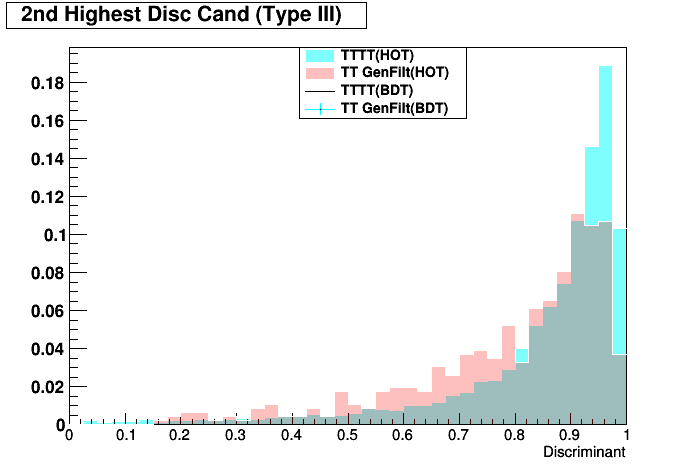

In [45]:
c26.cd()
h37s.SetFillColorAlpha(cols1, alphaS)
h37b.SetFillColorAlpha(colb1, alphaB)
h37s.SetLineColor(0)
h37b.SetLineColor(0)
h37b.SetMarkerStyle(5)
h37s.DrawNormalized()
h37b.DrawNormalized("Same")
print("Signal Entries: " + str(h37s.GetEntries()) + "\t\tBackground Entries: " + str(h37b.GetEntries()))
DiscLeg.Draw()
c26.Update()
c26.Draw()

Signal Entries: 13092.0		Background Entries: 1861.0


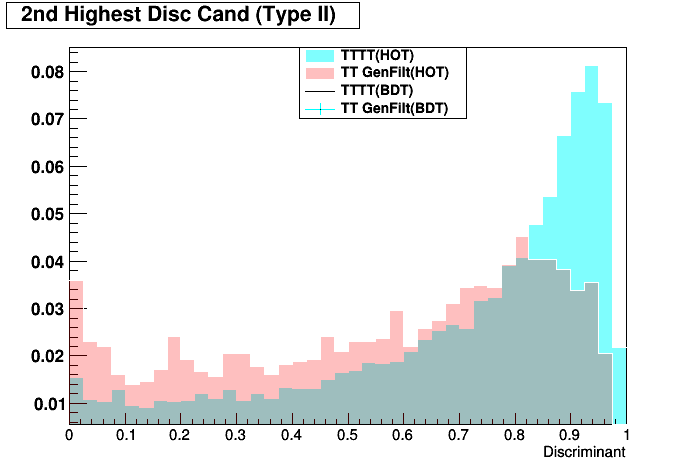

In [46]:
c27.cd()
h38s.SetFillColorAlpha(cols1, alphaS)
h38b.SetFillColorAlpha(colb1, alphaB)
h38s.SetLineColor(0)
h38b.SetLineColor(0)
h38b.SetMarkerStyle(5)
h38s.DrawNormalized()
h38b.DrawNormalized("Same")
print("Signal Entries: " + str(h38s.GetEntries()) + "\t\tBackground Entries: " + str(h38b.GetEntries()))
DiscLeg.Draw()
c27.Update()
c27.Draw()

Signal Entries: 4416.0		Background Entries: 0.0


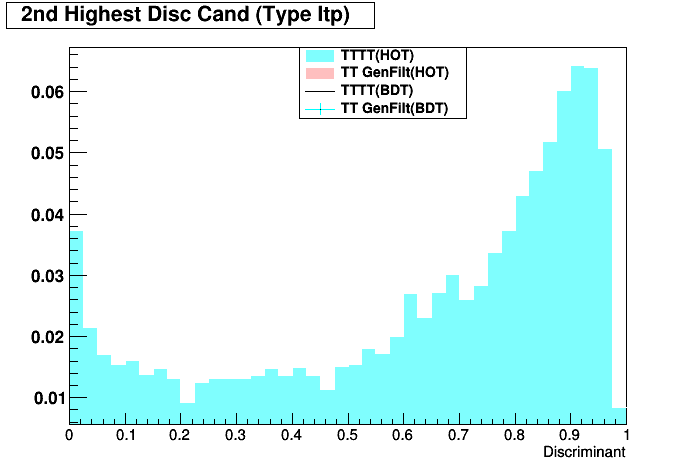

In [47]:
c28.cd()
h39s.SetFillColorAlpha(cols1, alphaS)
h39b.SetFillColorAlpha(colb1, alphaB)
h39s.SetLineColor(0)
h39b.SetLineColor(0)
h39b.SetMarkerStyle(5)
h39s.DrawNormalized()
#h39b.DrawNormalized("Same")
print("Signal Entries: " + str(h39s.GetEntries()) + "\t\tBackground Entries: " + str(h39b.GetEntries()))
DiscLeg.Draw()
c28.Update()
c28.Draw()

Signal Entries: 12057.0		Background Entries: 15635.0


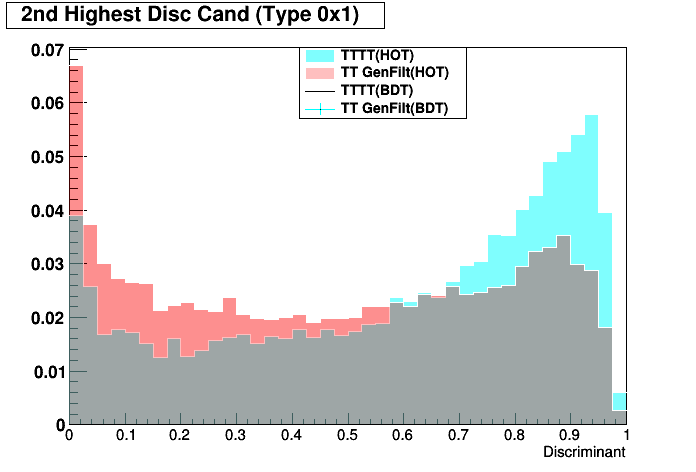

In [48]:
c29.cd()
h40s.SetFillColorAlpha(cols1, alphaS)
h40b.SetFillColorAlpha(colb1, alphaB)
h40s.SetLineColor(0)
h40b.SetLineColor(0)
h40b.SetMarkerStyle(5)
h40b.DrawNormalized()
h40s.DrawNormalized("Same")
h40b.DrawNormalized("Same")
print("Signal Entries: " + str(h40s.GetEntries()) + "\t\tBackground Entries: " + str(h40b.GetEntries()))
DiscLeg.Draw()
c29.Update()
c29.Draw()

Signal Entries: 33471.0		Background Entries: 17955.0


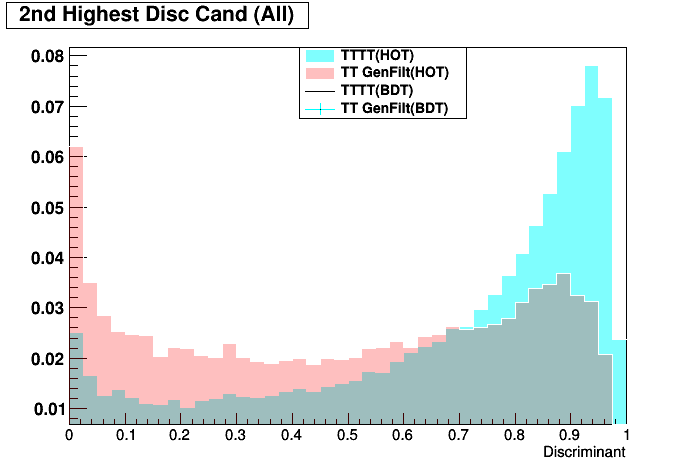

In [49]:
N2Ssum = h37s + h38s + h39s + h40s
N2Bsum = h37b + h38b + h39b + h40b
N2Ssum.SetTitle("2nd Highest Disc Cand (All)")
N2Ssum.SetLineColor(0)
N2Bsum.SetLineColor(0)
N2Ssum.SetFillColorAlpha(cols1, alphaS)
N2Bsum.SetFillColorAlpha(colb1, alphaB)
cN2.cd()
print("Signal Entries: " + str(N2Ssum.GetEntries()) + "\t\tBackground Entries: " + str(N2Bsum.GetEntries()))
N2Ssum.DrawNormalized()
N2Bsum.DrawNormalized("Same")
DiscLeg.Draw()
cN2.Update()
cN2.Draw()

In [50]:
SP2 = ROOT.TH1F("SP2", "(2nd Highest Discriminant); Discriminant; #frac{#epsilon_{background}}{#epsilon_{signal}}", N2Ssum.GetNbinsX(), 0, 1.0)
cSP2 = ROOT.TCanvas("cSP2")

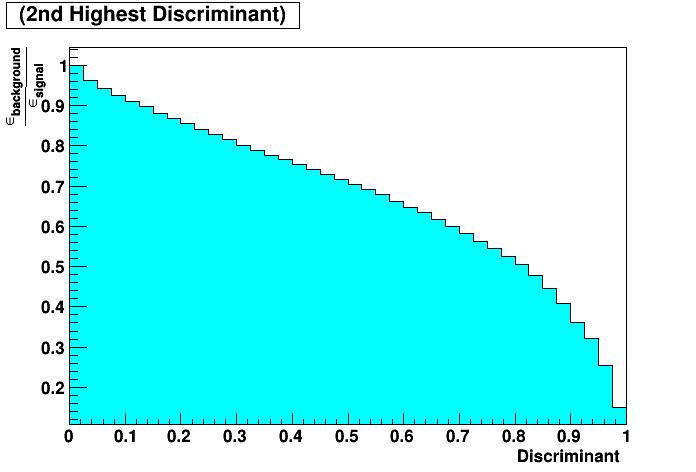

In [51]:
grid2 = xrange(N2Ssum.GetNbinsX()+1)
SInt2 = [N2Ssum.Integral(x, -1)/N2Ssum.Integral(0, -1) for x in grid2]
BInt2 = [N2Bsum.Integral(x, -1)/N2Bsum.Integral(0, -1) for x in grid2]
SepPow2 = [(BInt2[x])/(SInt2[x]) for x in grid2]
SP2.Reset()
SP2.SetFillColor(7)
for x in grid2:
    SP2.SetBinContent(x, SepPow2[x])
cSP2.cd()
SP2.Draw()
cSP2.Update()
cSP2.Draw()

In [52]:
ROC2 = ROOT.TH2D("ROC2", "(2nd Highest Discriminant) Efficiency post-event-selection;Signal Efficiency;Background Efficiency",
                 100, 0, 0.7, 100, 0, 0.65)
cROC2 = ROOT.TCanvas("cROC2")

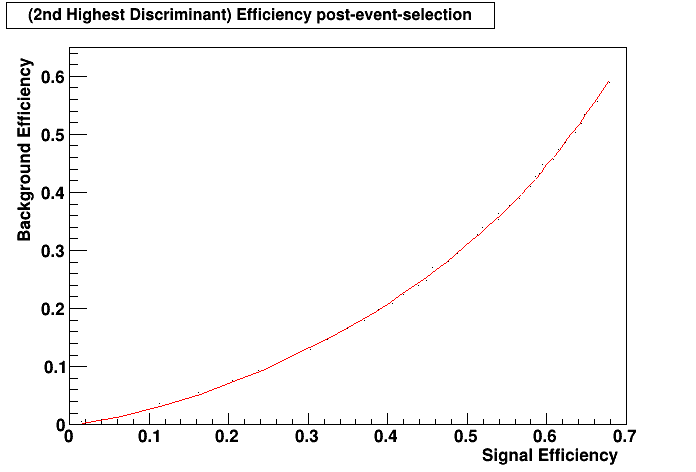

In [53]:
np22 = N2Ssum.GetNbinsX()+1
grid22 = xrange(np22)
#SInt22 = [N2Ssum.Integral(x, -1)/N2Ssum.Integral(0, -1) for x in grid22]
#BInt22 = [N2Bsum.Integral(x, -1)/N2Bsum.Integral(0, -1) for x in grid22]
SInt22 = [N2Ssum.Integral(x, -1)/49420 for x in grid22]
BInt22 = [N2Bsum.Integral(x, -1)/30373 for x in grid22]
ROC2gr = ROOT.TGraph(len(SInt22), array('d',SInt22), array('d',BInt22))
ROC2gr.SetLineColor(2)
ROC2.Reset()
for x in grid22:
    ROC2.Fill(SInt22[x], BInt22[x])
    #ROC2.SetBinContent(x, SepPow2[x])
cROC2.cd()
ROC2.Draw()
ROC2gr.Draw("SAME")
cROC2.Update()
cROC2.Draw()

In [54]:
#h41s = signal.h_eventN3_tIII_hot#;1	Highest Disc Cand (Type III) 
#h42s = signal.h_eventN3_tII_hot#;1	Highest Disc Cand (Type II) 
#h43s = signal.h_eventN3_tItp_hot#;1	Highest Disc Cand (Type Itp) 
#h44s = signal.h_eventN3_t0x1_hot#;1	Highest Disc Cand (Type 0x1) 

#h41b = bkgd.h_eventN3_tIII_hot#;1	Highest Disc Cand (Type III) 
#h42b = bkgd.h_eventN3_tII_hot#;1	Highest Disc Cand (Type II) 
#h43b = bkgd.h_eventN3_tItp_hot#;1	Highest Disc Cand (Type Itp) 
#h44b = bkgd.h_eventN3_t0x1_hot#;1	Highest Disc Cand (Type 0x1) 

s_hot_N3_sum = signal.h_eventN3_sum_hot
s_hot_N3_3 = signal.h_eventN3_tIII_hot#;1	Highest Disc Cand (Type III) 
s_hot_N3_2 = signal.h_eventN3_tII_hot#;1	Highest Disc Cand (Type II) 
s_hot_N3_1 = signal.h_eventN3_tItp_hot#;1	Highest Disc Cand (Type Itp) 
s_hot_N3_0 = signal.h_eventN3_t0x1_hot#;1	Highest Disc Cand (Type 0x1)

b_hot_N3_sum = bkgd.h_eventN3_sum_hot
b_hot_N3_3 = bkgd.h_eventN3_tIII_hot#;1	Highest Disc Cand (Type III) 
b_hot_N3_2 = bkgd.h_eventN3_tII_hot#;1	Highest Disc Cand (Type II) 
b_hot_N3_1 = bkgd.h_eventN3_tItp_hot#;1	Highest Disc Cand (Type Itp) 
b_hot_N3_0 = bkgd.h_eventN3_t0x1_hot#;1	Highest Disc Cand (Type 0x1) 

s_bdt_N3_sum = signal.h_eventN3_sum_bdt
s_bdt_N3_3 = signal.h_eventN3_tIII_bdt#;1	Highest Disc Cand (Type III) 
s_bdt_N3_2 = signal.h_eventN3_tII_bdt#;1	Highest Disc Cand (Type II) 
s_bdt_N3_1 = signal.h_eventN3_tItp_bdt#;1	Highest Disc Cand (Type Itp) 
s_bdt_N3_0 = signal.h_eventN3_t0x1_bdt#;1	Highest Disc Cand (Type 0x1) 

b_bdt_N3_sum = bkgd.h_eventN3_sum_bdt
b_bdt_N3_3 = bkgd.h_eventN3_tIII_bdt#;1	Highest Disc Cand (Type III) 
b_bdt_N3_2 = bkgd.h_eventN3_tII_bdt#;1	Highest Disc Cand (Type II) 
b_bdt_N3_1 = bkgd.h_eventN3_tItp_bdt#;1	Highest Disc Cand (Type Itp) 
b_bdt_N3_0 = bkgd.h_eventN3_t0x1_bdt#;1	Highest Disc Cand (Type 0x1)

h41s = s_hot_N3_3.ProjectionX("s_hot_N3_3_px")
h42s = s_hot_N3_2.ProjectionX("s_hot_N3_2_px")
h43s = s_hot_N3_1.ProjectionX("s_hot_N3_1_px")
h44s = s_hot_N3_0.ProjectionX("s_hot_N3_0_px")

h41b = b_hot_N3_3.ProjectionX("b_hot_N3_3_px")
h42b = b_hot_N3_2.ProjectionX("b_hot_N3_2_px")
h43b = b_hot_N3_1.ProjectionX("b_hot_N3_1_px")
h44b = b_hot_N3_0.ProjectionX("b_hot_N3_0_px")

h41s2 = s_bdt_N3_3.ProjectionX("s_bdt_N3_3_px")
h42s2 = s_bdt_N3_2.ProjectionX("s_bdt_N3_2_px")
h43s2 = s_bdt_N3_1.ProjectionX("s_bdt_N3_1_px")
h44s2 = s_bdt_N3_0.ProjectionX("s_bdt_N3_0_px")

h41b2 = b_bdt_N3_3.ProjectionX("b_bdt_N3_3_px")
h42b2 = b_bdt_N3_2.ProjectionX("b_bdt_N3_2_px")
h43b2 = b_bdt_N3_1.ProjectionX("b_bdt_N3_1_px")
h44b2 = b_bdt_N3_0.ProjectionX("b_bdt_N3_0_px")

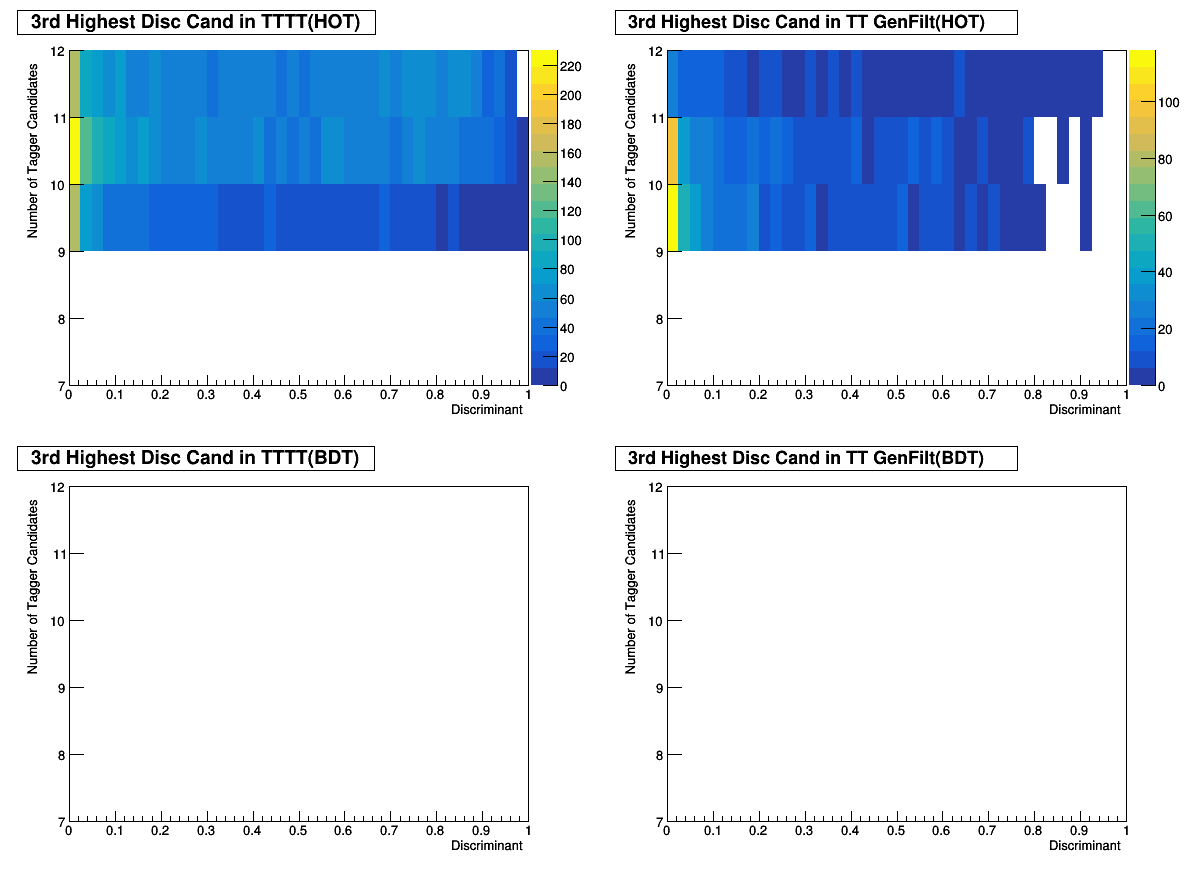

In [55]:
#cs_hot_N3_3 = ROOT.TCanvas("cs_hot_N3_3")
#cs_hot_N3_3.cd()
#b_hot_N3_3.SetFillColorAlpha(cols1, alphaS)
#b_hot_N3_3.SetLineColor(0)
#b_hot_N3_3.Draw("COLZ")
#cs_hot_N3_3.Update()
#cs_hot_N3_3.Draw())

cN3_JC = ROOT.TCanvas("cN3_JC", "Disc vs nJet of 3rd highest tagger candidates", 1200, 900)
cN3_JC.Divide(2,2)
cN3_JC.cd(1)
s_hot_N3_sum.SetTitle("3rd Highest Disc Cand in " + leg1)
s_hot_N3_sum.SetNdivisions(5, "Y")
s_hot_N3_sum.Draw("COLZ")
cN3_JC.cd(2)
b_hot_N3_sum.SetTitle("3rd Highest Disc Cand in " + leg2)
b_hot_N3_sum.SetNdivisions(5, "Y")
b_hot_N3_sum.Draw("COLZ")
cN3_JC.cd(3)
s_bdt_N3_sum.SetTitle("3rd Highest Disc Cand in " + leg3)
s_bdt_N3_sum.SetNdivisions(5, "Y")
s_bdt_N3_sum.Draw("COLZ")
cN3_JC.cd(4)
b_bdt_N3_sum.SetTitle("3rd Highest Disc Cand in " + leg4)
b_bdt_N3_sum.SetNdivisions(5, "Y")
b_bdt_N3_sum.Draw("COLZ")
cN3_JC.Update()
cN3_JC.Draw()

In [56]:
N3Normalize = True

cN3_JP = ROOT.TCanvas("cN3_JP", "Profile (Disc vs nJet) of 3rd highest tagger candidates", 1200, 900)
cN3_JP.Divide(2,2)
cN3_JP.cd(1)
#s_hot_N3_7J = s_hot_N3_sum.ProjectionX("s_hot_N3_7J", 0, 1)
#s_hot_N3_7J.SetTitle("3rd Highest Disc Cand in 7 Jets")
#s_hot_N3_7J.SetLineColor(0)
#s_hot_N3_7J.SetFillColorAlpha(cols1, alphaS)
#b_hot_N3_7J = b_hot_N3_sum.ProjectionX("b_hot_N3_7J", 0, 1)
#b_hot_N3_7J.SetLineColor(0)
#b_hot_N3_7J.SetFillColorAlpha(colb1, alphaB)
#s_bdt_N3_7J = s_bdt_N3_sum.ProjectionX("s_bdt_N3_7J", 0, 1)
#s_bdt_N3_7J.SetLineColor(cols2)
#b_bdt_N3_7J = b_bdt_N3_sum.ProjectionX("b_bdt_N3_7J", 0, 1)
#b_bdt_N3_7J.SetLineColor(colb2)
#if N3Normalize:
#    s_hot_N3_7J.DrawNormalized()
#    b_hot_N3_7J.DrawNormalized("SAME")
#    s_bdt_N3_7J.DrawNormalized("SAME")
#    b_bdt_N3_7J.DrawNormalized("SAME")
#else:
#    s_hot_N3_7J.Draw()
#    b_hot_N3_7J.Draw("SAME")
#    s_bdt_N3_7J.Draw("SAME")
#    b_bdt_N3_7J.Draw("SAME")

#cN3_JP.cd(2)
#s_hot_N3_8J = s_hot_N3_sum.ProjectionX("s_hot_N3_8J", 1, 2)
#s_hot_N3_8J.SetTitle("3rd Highest Disc Cand in 8 Jets")
#s_hot_N3_8J.SetLineColor(0)
#s_hot_N3_8J.SetFillColorAlpha(cols1, alphaS)
#b_hot_N3_8J = b_hot_N3_sum.ProjectionX("b_hot_N3_8J", 1, 2)
#b_hot_N3_8J.SetLineColor(0)
#b_hot_N3_8J.SetFillColorAlpha(colb1, alphaB)
#s_bdt_N3_8J = s_bdt_N3_sum.ProjectionX("s_bdt_N3_8J", 1, 2)
#s_bdt_N3_8J.SetLineColor(cols2)
#b_bdt_N3_8J = b_bdt_N3_sum.ProjectionX("b_bdt_N3_8J", 1, 2)
#b_bdt_N3_8J.SetLineColor(colb2)
#if N3Normalize:
#    s_hot_N3_8J.DrawNormalized()
#    b_hot_N3_8J.DrawNormalized("SAME")
#    s_bdt_N3_8J.DrawNormalized("SAME")
#    b_bdt_N3_8J.DrawNormalized("SAME")
#else:
#    s_hot_N3_8J.Draw()
#    b_hot_N3_8J.Draw("SAME")
#    s_bdt_N3_8J.Draw("SAME")
#    b_bdt_N3_8J.Draw("SAME")

cN3_JP.cd(3)
s_hot_N3_9J = s_hot_N3_sum.ProjectionX("s_hot_N3_9J", 2, 3)
s_hot_N3_9J.SetTitle("3rd Highest Disc Cand in 9 Jets")
s_hot_N3_9J.SetLineColor(0)
s_hot_N3_9J.SetFillColorAlpha(cols1, alphaS)
b_hot_N3_9J = b_hot_N3_sum.ProjectionX("b_hot_N3_9J", 2, 3)
b_hot_N3_9J.SetLineColor(0)
b_hot_N3_9J.SetFillColorAlpha(colb1, alphaB)
s_bdt_N3_9J = s_bdt_N3_sum.ProjectionX("s_bdt_N3_9J", 2, 3)
s_bdt_N3_9J.SetLineColor(cols2)
b_bdt_N3_9J = b_bdt_N3_sum.ProjectionX("b_bdt_N3_9J", 2, 3)
b_bdt_N3_9J.SetLineColor(colb2)
if N3Normalize:
    s_hot_N3_9J.DrawNormalized()
    b_hot_N3_9J.DrawNormalized("SAME")
    s_bdt_N3_9J.DrawNormalized("SAME")
    b_bdt_N3_9J.DrawNormalized("SAME")
else:
    s_hot_N3_9J.Draw()
    b_hot_N3_9J.Draw("SAME")
    s_bdt_N3_9J.Draw("SAME")
    b_bdt_N3_9J.Draw("SAME")
    
#Set Legend for all histograms concurrently
cN3_Leg = ROOT.TLegend(0.43, 0.75, 0.67, 0.90)
cN3_Leg.AddEntry(s_hot_N3_7J,leg1,"f")
cN3_Leg.AddEntry(b_hot_N3_7J,leg2,"f")
cN3_Leg.AddEntry(s_bdt_N3_7J,leg3,"l")
cN3_Leg.AddEntry(b_bdt_N3_7J,leg4,"l")
cN3_Leg.Draw()

cN3_JP.cd(4)
s_hot_N3_10pJ = s_hot_N3_sum.ProjectionX("s_hot_N3_10+J", 3, 7)
s_hot_N3_10pJ.SetTitle("3rd Highest Disc Cand in 10+ Jets")
s_hot_N3_10pJ.SetLineColor(0)
s_hot_N3_10pJ.SetFillColorAlpha(cols1, alphaS)
b_hot_N3_10pJ = b_hot_N3_sum.ProjectionX("b_hot_N3_10+J", 3, 7)
b_hot_N3_10pJ.SetLineColor(0)
b_hot_N3_10pJ.SetFillColorAlpha(colb1, alphaB)
s_bdt_N3_10pJ = s_bdt_N3_sum.ProjectionX("s_bdt_N3_10+J", 3, 7)
s_bdt_N3_10pJ.SetLineColor(cols2)
b_bdt_N3_10pJ = b_bdt_N3_sum.ProjectionX("b_bdt_N3_10+J", 3, 7)
b_bdt_N3_10pJ.SetLineColor(colb2)
if N3Normalize:
    s_hot_N3_10pJ.DrawNormalized()
    b_hot_N3_10pJ.DrawNormalized("SAME")
    s_bdt_N3_10pJ.DrawNormalized("SAME")
    b_bdt_N3_10pJ.DrawNormalized("SAME")
else:
    s_hot_N3_10pJ.Draw()
    b_hot_N3_10pJ.Draw("SAME")
    s_bdt_N3_10pJ.Draw("SAME")
    b_bdt_N3_10pJ.Draw("SAME")
cN3_JP.Update()
cN3_JP.Draw()
print(leg1 + " entries: " + str(s_hot_N3_7J.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N3_7J.GetEntries()))
print(leg1 + " entries: " + str(s_hot_N3_8J.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N3_8J.GetEntries()))
print(leg1 + " entries: " + str(s_hot_N3_9J.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N3_9J.GetEntries()))
print(leg1 + " entries: " + str(s_hot_N3_10pJ.GetEntries()) + 
        "\t" + leg2 + " entries: " + str(b_hot_N3_10pJ.GetEntries()))

NameError: name 's_hot_N3_7J' is not defined

Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: s_bdt_N3_9J
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: b_bdt_N3_9J


In [ ]:
c30.cd()
h41s.SetFillColorAlpha(cols1, alphaS)
h41b.SetFillColorAlpha(colb1, alphaB)
h41s.SetLineColor(0)
h41b.SetLineColor(0)
h41b.SetMarkerStyle(5)
h41b.DrawNormalized()
h41s.DrawNormalized("Same")
print("Signal Entries: " + str(h41s.GetEntries()) + "\t\tBackground Entries: " + str(h41b.GetEntries()))
DiscLeg.Draw()
c30.Update()
c30.Draw()

In [ ]:
c31.cd()
h42s.SetFillColorAlpha(cols1, alphaS)
h42b.SetFillColorAlpha(colb1, alphaB)
h42s.SetLineColor(0)
h42b.SetLineColor(0)
h42b.SetMarkerStyle(5)
h42b.DrawNormalized()
h42s.DrawNormalized("Same")
h42b.DrawNormalized("Same")
print("Signal Entries: " + str(h42s.GetEntries()) + "\t\tBackground Entries: " + str(h42b.GetEntries()))
DiscLeg.Draw()
c31.Update()
c31.Draw()

In [ ]:
c32.cd()
h43s.SetFillColorAlpha(cols1, alphaS)
h43b.SetFillColorAlpha(colb1, alphaB)
h43s.SetLineColor(0)
h43b.SetLineColor(0)
h43b.SetMarkerStyle(5)
h43s.DrawNormalized()
h43b.DrawNormalized("Same")
print("Signal Entries: " + str(h43s.GetEntries()) + "\t\tBackground Entries: " + str(h43b.GetEntries()))
DiscLeg.Draw()
c32.Update()
c32.Draw()

In [ ]:
c33.cd()
h44s.SetFillColorAlpha(cols1, alphaS)
h44b.SetFillColorAlpha(colb1, alphaB)
h44s.SetLineColor(0)
h44b.SetLineColor(0)
h44b.SetMarkerStyle(5)
h44b.DrawNormalized()
h44s.DrawNormalized("Same")
h44b.DrawNormalized("Same")
print("Signal Entries: " + str(h44s.GetEntries()) + "\t\tBackground Entries: " + str(h44b.GetEntries()))
DiscLeg.Draw()
c33.Update()
c33.Draw()

In [ ]:
N3Ssum = h41s + h42s + h43s + h44s
N3Bsum = h41b + h42b + h43b + h44b
N3Ssum.SetTitle("3rd Highest Disc Cand (All)")
N3Bsum.SetTitle("3rd Highest Disc Cand (All)")
N3Ssum.SetLineColor(0)
N3Bsum.SetLineColor(0)
N3Ssum.SetFillColorAlpha(cols1, alphaS)
N3Bsum.SetFillColorAlpha(colb1, alphaB)
cN3.cd()
print("Signal Entries: " + str(N3Ssum.GetEntries()) + "\t\tBackground Entries: " + str(N3Bsum.GetEntries()))
N3Bsum.DrawNormalized()
N3Ssum.DrawNormalized("Same")
N3Bsum.DrawNormalized("Same")
#   legend->Draw();
DiscLeg.Draw()
cN3.Update()
cN3.Draw()

In [ ]:
SP3 = ROOT.TH1F("SP3", "(3rd Highest Discriminant); Discriminant; Significance/Power", N3Ssum.GetNbinsX(), 0, 1.0)
cSP3 = ROOT.TCanvas("cSP3")

In [ ]:
grid3 = xrange(N2Ssum.GetNbinsX()+1)
SInt3 = [N3Ssum.Integral(x, -1)/N3Ssum.GetEntries() for x in grid3]
BInt3 = [N3Bsum.Integral(x, -1)/N3Bsum.GetEntries() for x in grid3]
SepPow3 = [(BInt3[x])/(SInt3[x]) for x in grid2]
SP3.Reset()
SP3.SetFillColor(7)
for x in grid3:
    SP3.SetBinContent(x, SepPow3[x])
cSP3.cd()
SP3.Draw()
cSP3.Update()
cSP3.Draw()